<a href="https://colab.research.google.com/github/johhan27/stocks/blob/main/Stock_MultiCharts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3MB 15.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=5e708731d3ebd2aac84867a38636b1c21bb8428fad7e4a08e6cb96fac5a33e9f
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean 
import pandas as pd 
import numpy as np 
import datetime as dt

In [ ]:
test = yf.Ticker('AMZN')

In [ ]:
test.history(period='6mo')

Open         High  ...  Dividends  Stock Splits
Date                                  ...                         
2020-11-06  3304.639893  3322.000000  ...          0             0
2020-11-09  3231.030029  3289.000000  ...          0             0
2020-11-10  3095.020020  3114.000000  ...          0             0
2020-11-11  3061.780029  3139.149902  ...          0             0
2020-11-12  3159.949951  3175.879883  ...          0             0
...                 ...          ...  ...        ...           ...
2021-04-30  3525.120117  3554.000000  ...          0             0
2021-05-03  3484.729980  3486.649902  ...          0             0
2021-05-04  3356.189941  3367.979980  ...          0             0
2021-05-05  3338.860107  3354.699951  ...          0             0
2021-05-06  3270.000000  3314.399902  ...          0             0

[124 rows x 7 columns]

In [ ]:
def MultiCharts(tickers, plot_dma=True):
  for ticker in tickers:
    ticker_obj = yf.Ticker(ticker)

    #Get the info long term
    info = ticker_obj.history(period="6mo")
    prices = info[['Open', 'High', 'Low', 'Close']]
    current_price = str(round(prices['Close'][-1], 2))
    high = str(round(prices['High'].max(),2))
    low = str(round(prices['Low'].min(),2))
    #print (type(info.index.to_list()[0]))

    #Get info object for DMAs
    info_dma_full = ticker_obj.history(period="12mo")
    info_dma = pd.DataFrame(info_dma_full[['Open', 'High', 'Low', 'Close']])
    info_dma_index_list = info_dma.index.to_list() #to ease reading and make "index" possible to use to find the position of a row and go back X # of positions
    info_dma['100dma'] = [mean(info_dma.iloc[info_dma_index_list.index(index)-99:info_dma_index_list.index(index)+1]['Close']) if (index >= info.index[0]) and (len(info_dma) > 220) else 0  for index, Series in info_dma.iterrows()]
    info_dma['50dma'] = [mean(info_dma.iloc[info_dma_index_list.index(index)-49:info_dma_index_list.index(index)+1]['Close']) if (index >= info.index[0]) and (len(info_dma) > 220) else 0  for index, Series in info_dma.iterrows()]
    #info_dma['Date'] = info_dma_index_list needed it for the "complicated" multicolumn y-plot
    prices_and_dma = info_dma[(info_dma.index >= info.index[0])][['Close', '100dma', '50dma']] #slicing 6 months since dma is originally 12mo

    #info_dma['100dma'] = [mean(info_dma.iloc[info_dma_index_list.index(index)-100:info_dma_index_list.index(index)]) if index >= info.index[0]  else 0  for index, Series in info_dma.iterrows()]
    #print(info_dma.index)
    #print([[index, Series] for index, Series in info_dma.iloc[:10].iterrows()])
    #print([info_dma.index.to_list().index(my_index) for my_index, Series in info_dma.iloc[:10].iterrows()])
    #print(info_dma)

    #get info for 100DMA and 50DMA discrete values (first try before realizing that a linear plot of these was more useful)
    info_100_dma = ticker_obj.history(period="100d")
    info_50_dma = ticker_obj.history(period='50d')
    dma_100 = str(round(mean(info_100_dma['Close']),2))
    dma_50 = str(round(mean(info_50_dma['Close']),2))

    #get info short term
    wk_info = ticker_obj.history(period="2wk")
    wk_prices = wk_info[['Open', 'High', 'Low', 'Close']]

    fig, ax =plt.subplots(1,3, figsize=[36,6])
    #fig.suptitle(ticker+"         price: "+current_price+"      high: "+high+"       low: "+low+ "     50dma: "+dma_50+ "      100dma:"+dma_100, )
    fig.suptitle(ticker+"         price: $"+current_price, fontsize='x-large', fontweight='bold')

    sns.lineplot(data=wk_prices, ax=ax[0])

    #sns.lineplot(x='Date', y='Close',data=prices, ax=ax[1])
    #sns.lineplot(x='Date', y='value', hue='variable',data=pd.melt(info_dma[(info_dma.index >= info.index[0])],['Date'] , ['Close', '100dma', '50dma'] ), ax=ax[1])
    if len(info_dma) >= 220 and plot_dma == True:
      sns.lineplot(data=prices_and_dma, ax=ax[2])
      sns.lineplot(x='Date', y='Close',data=prices, ax=ax[1])
      #ax[1].text(prices.index[0],prices['Open'].max(),'an equation: $E=mc^2$', fontsize=15)
      fig.show()
    else:
      sns.lineplot(x='Date', y='Close',data=prices, ax=ax[1]) 
      fig.show()

    if plot_dma == False:
      sns.lineplot(x='Date', y='Close',data=prices, ax=ax[1]) 
      fig.show()


    """
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(data_preproc, ['Year']))
"""

In [ ]:
my_tickers = ["COIN","CVNA","SFIX","ETSY", "OPEN", "MILE",'TWLO',"ABNB", "SNOW", "AFRM", "BYND", "DASH", "UBER", "NFLX", "PYPL", "PDD", "SHOP", "SNAP", "SPCE", "SPOT", "SQ", "TSLA", "NIO", "PLTR"]
other_tickers = ["CPNG","U","RBLX","OKTA", "DOCU","BMBL","BILI", "MGNI", "UPST", "JMIA", "FVRR", "DOMO", "INSG","NET","NVTA", "TWOU", "RIOT", "UBX"]
bio_tickers = ["NTRA", "FLGT", "BEAM", "EDIT", "CRSP", "NTLA", "BNTX", "MRNA", 'GBIO']
blue_chips = ['AAPL', 'AMZN', 'GOOG', 'AMD', 'ZM', 'BAC', 'TWTR', 'FB', 'MSFT','DIS', 'ILMN', 'TCEHY', 'BABA', "SPY", "SQQQ"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

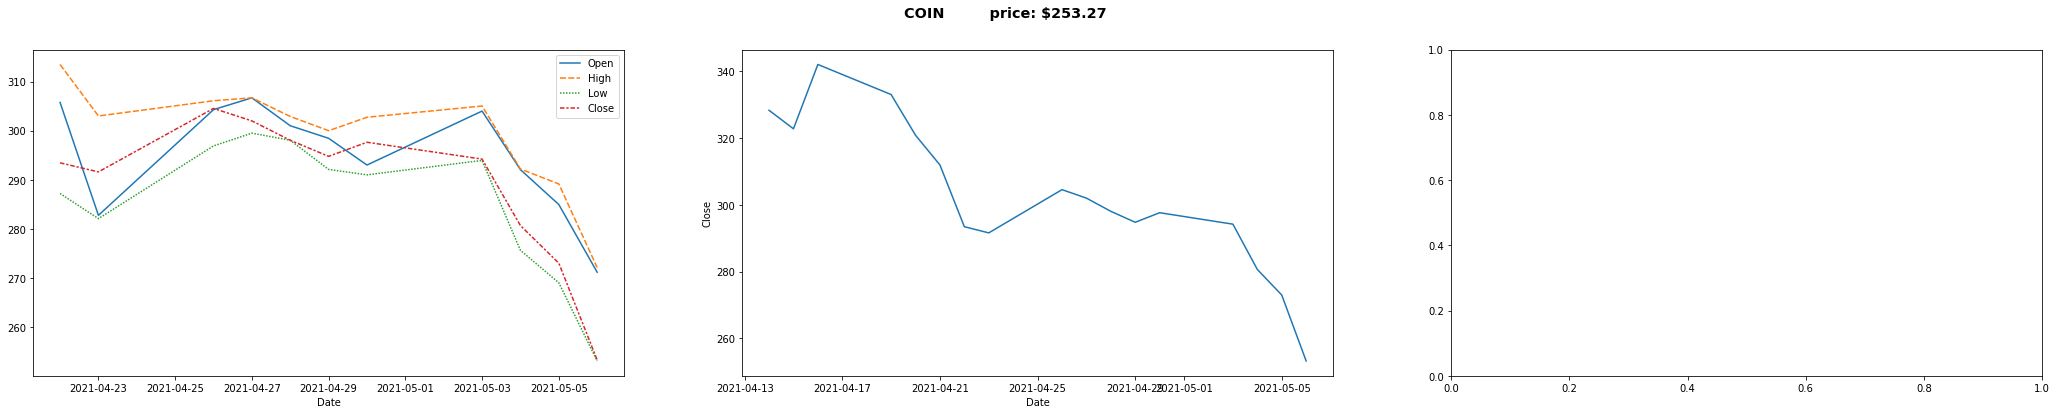

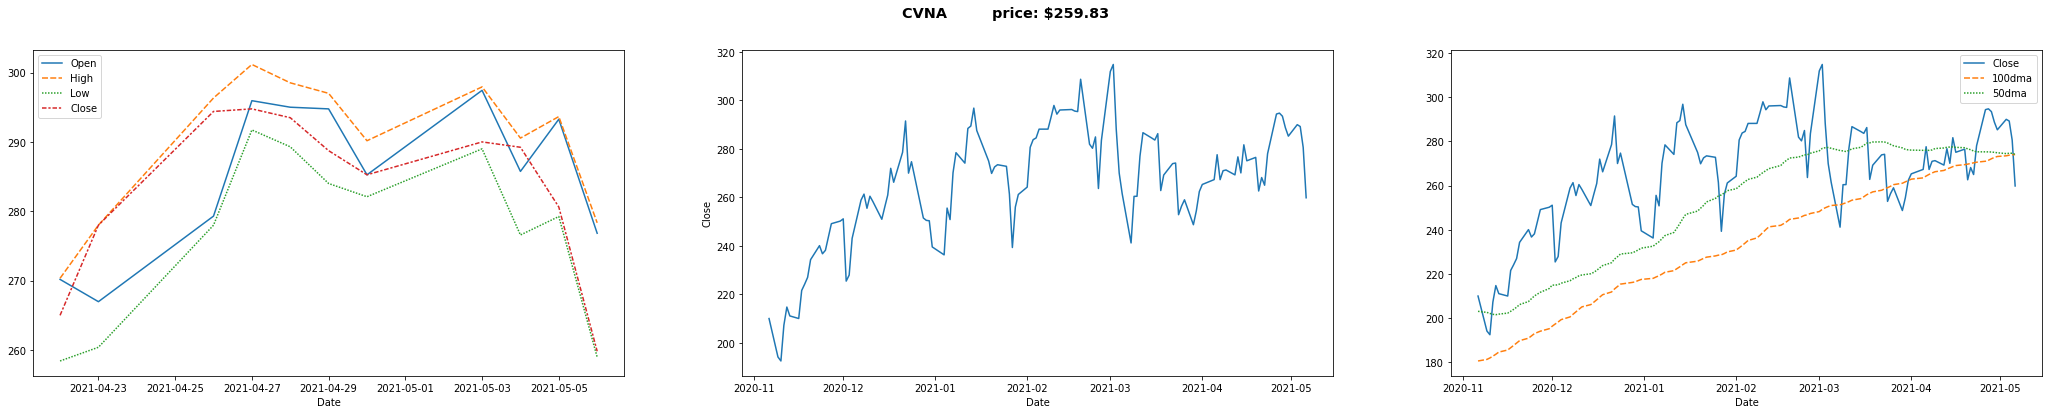

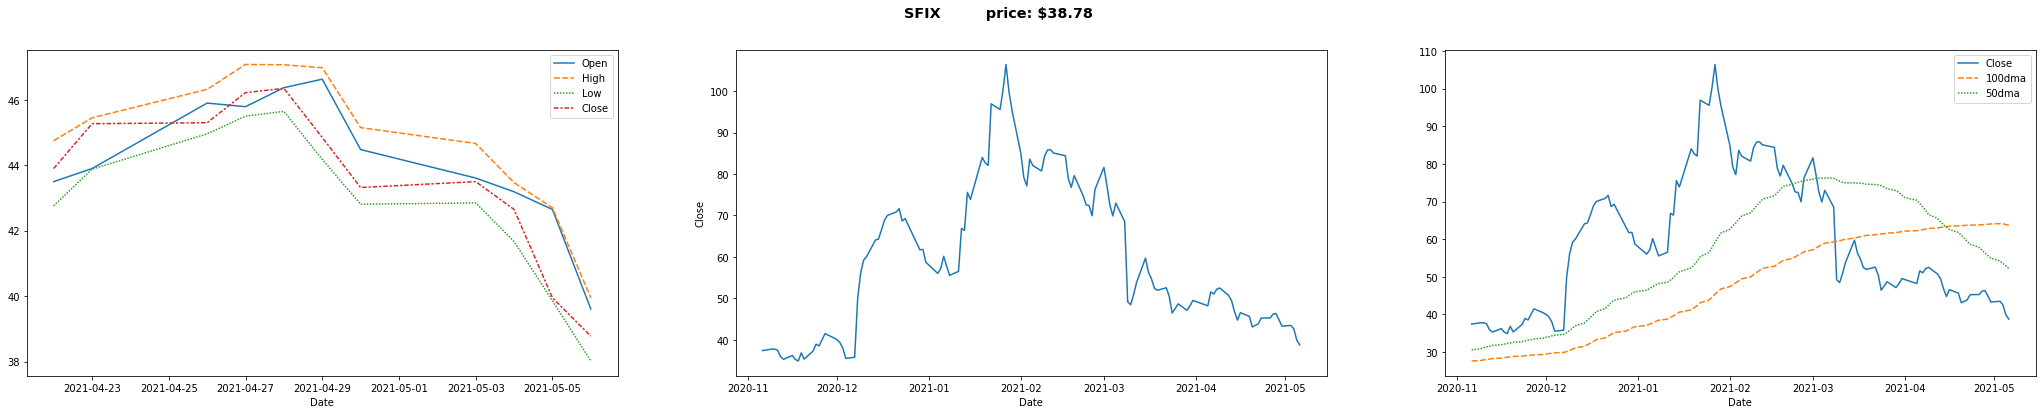

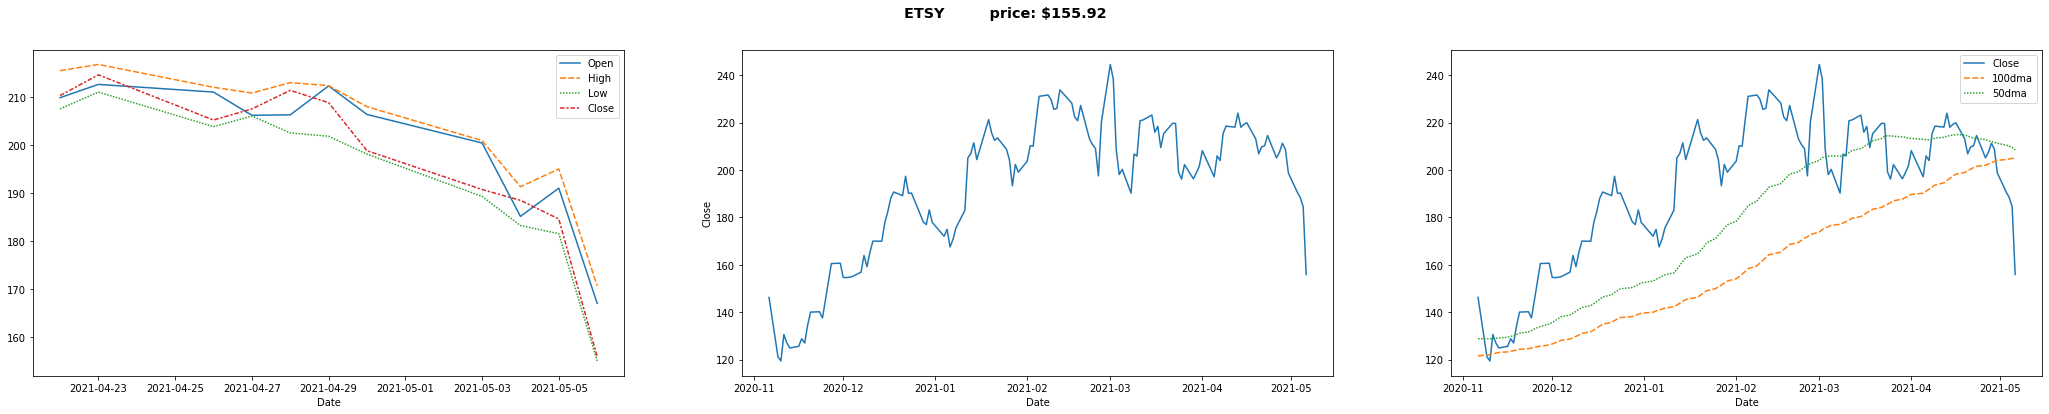

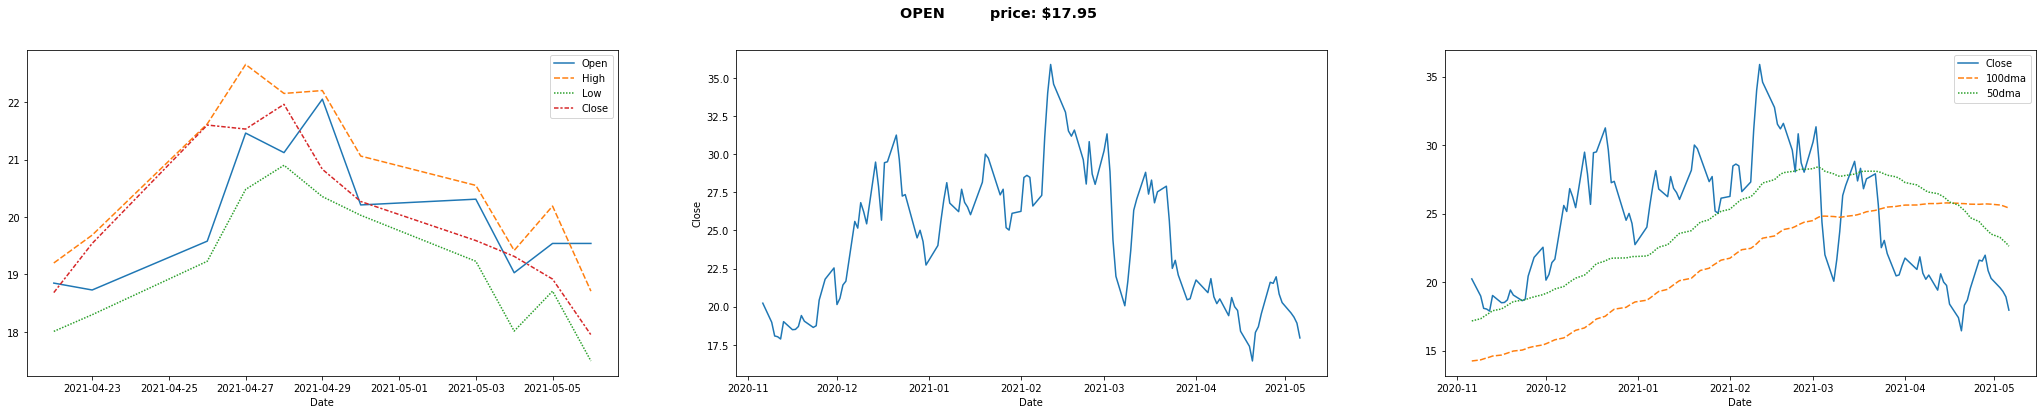

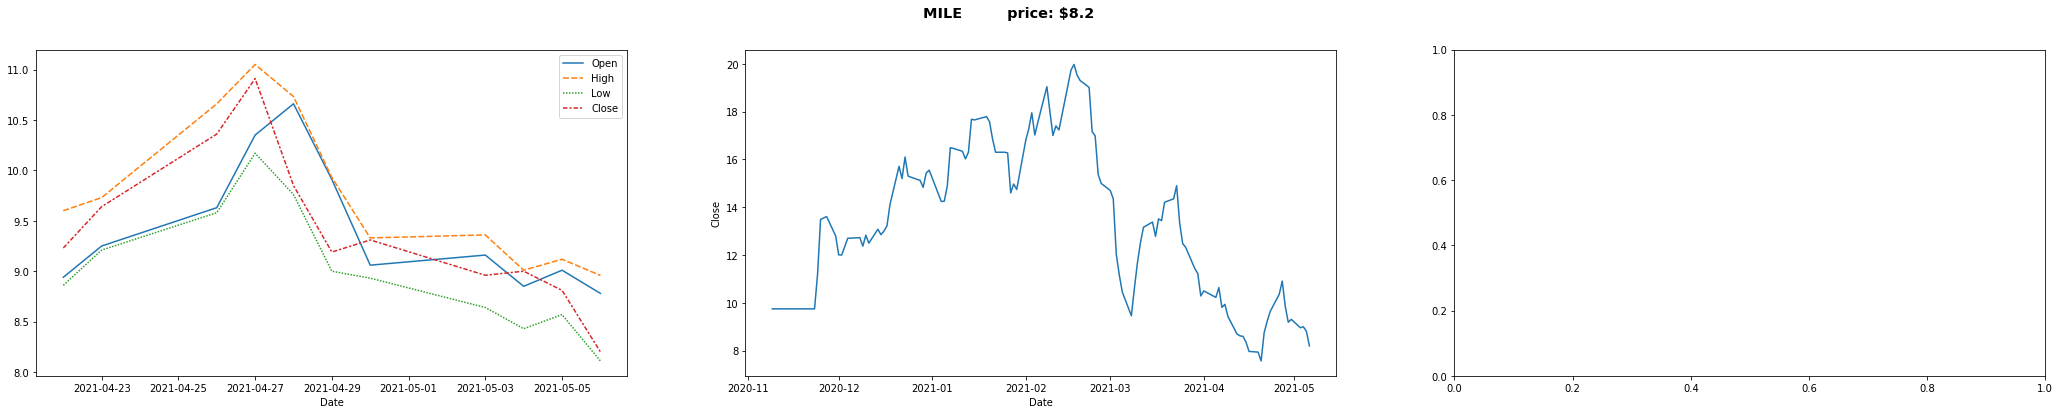

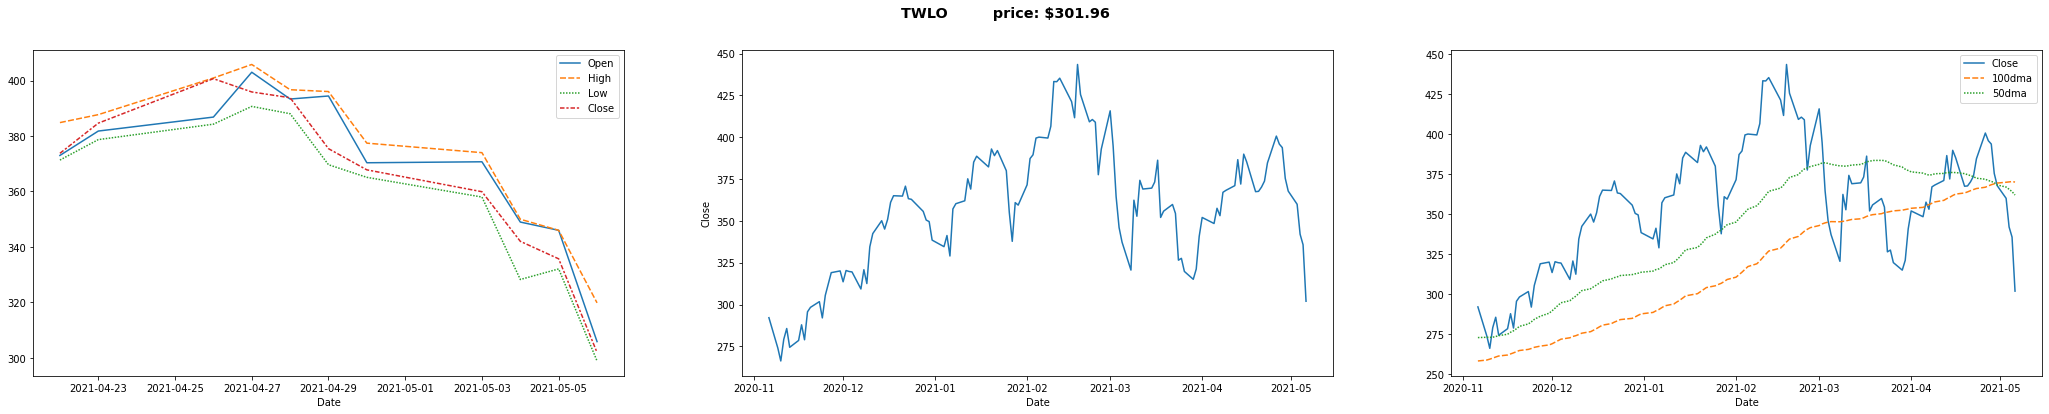

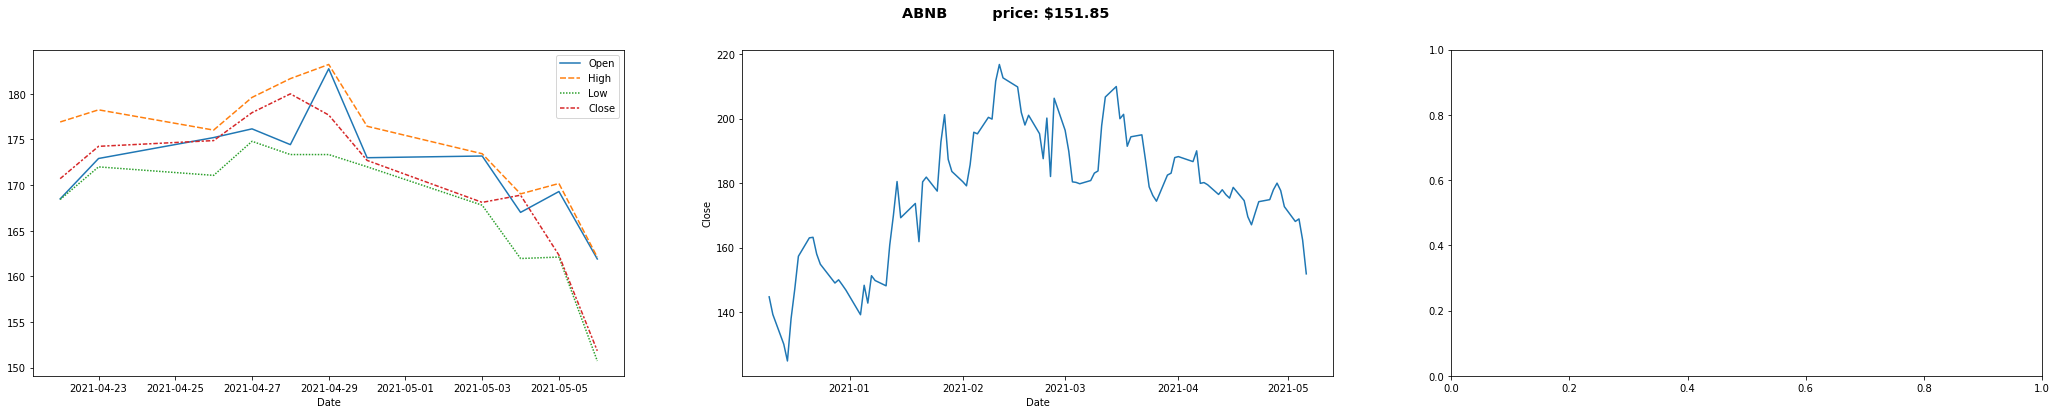

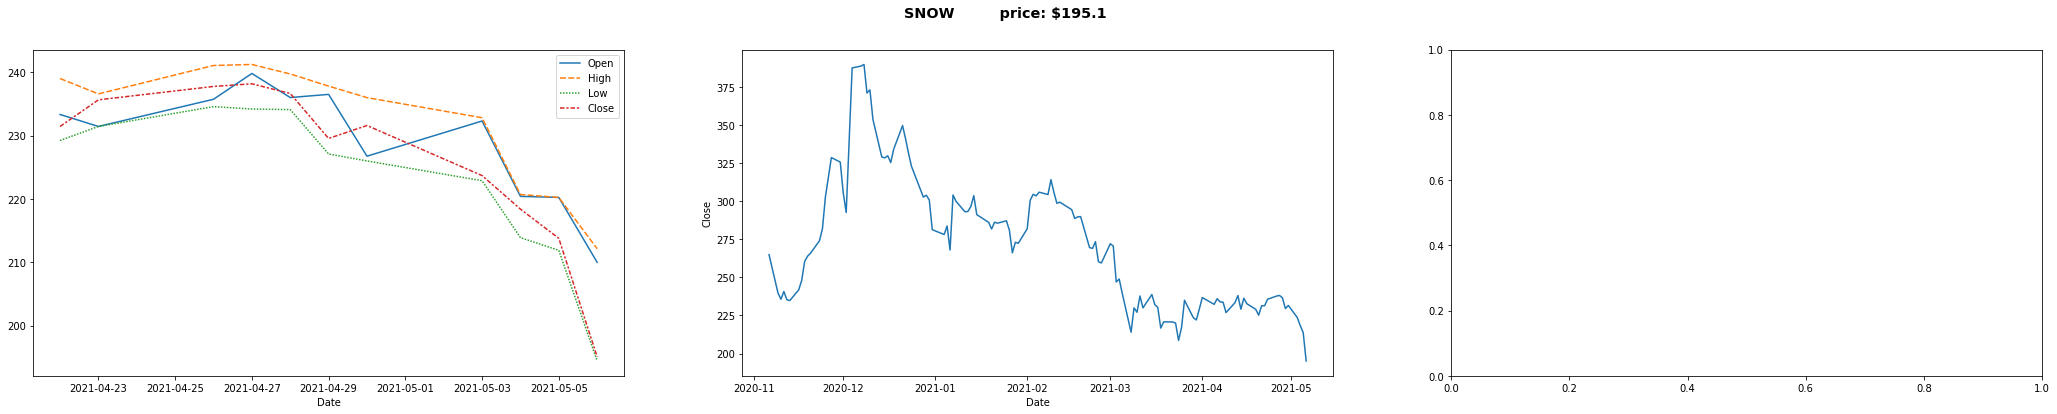

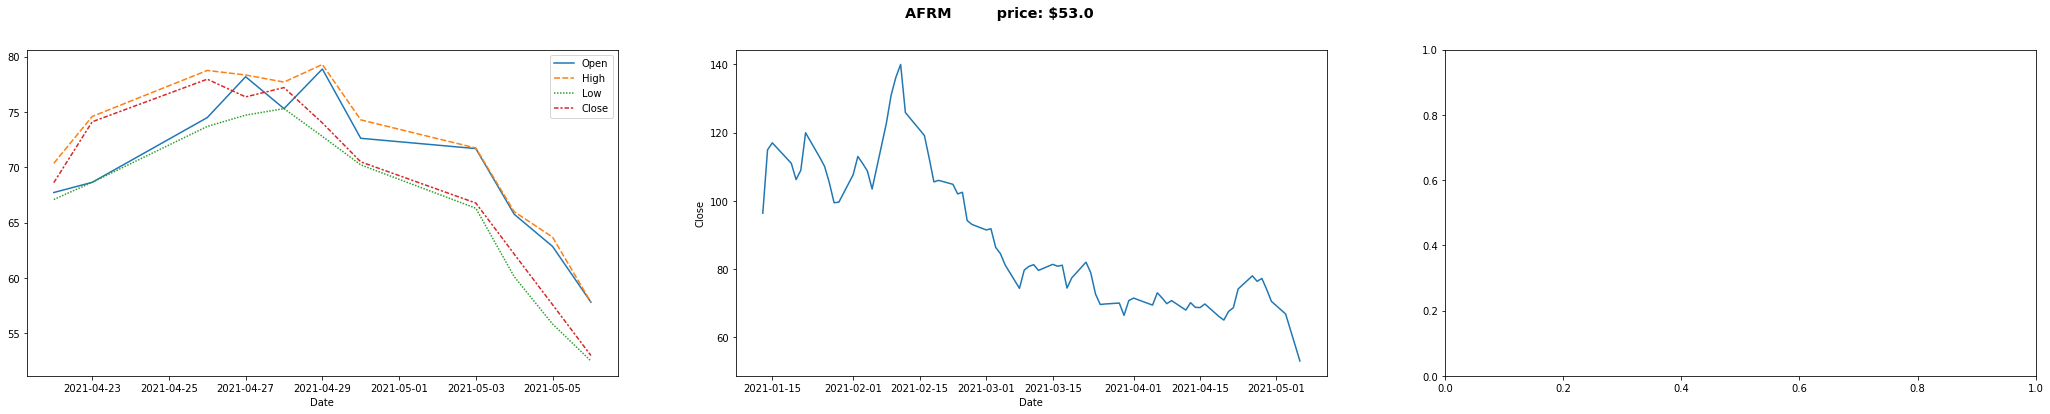

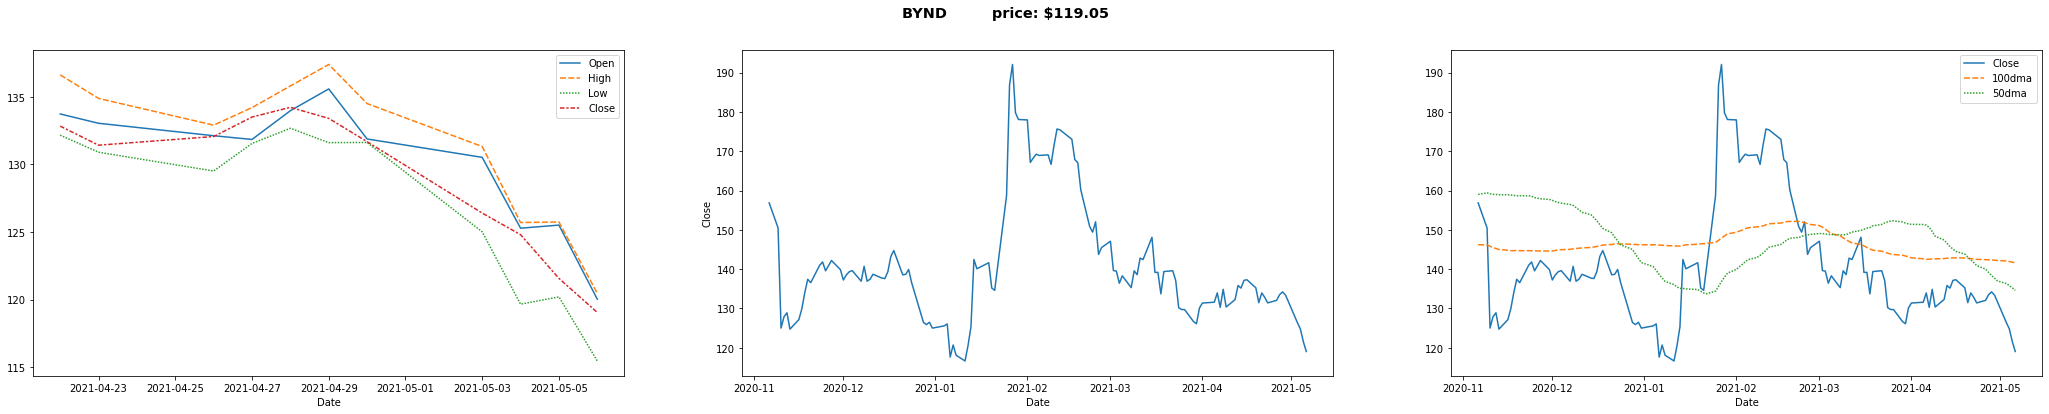

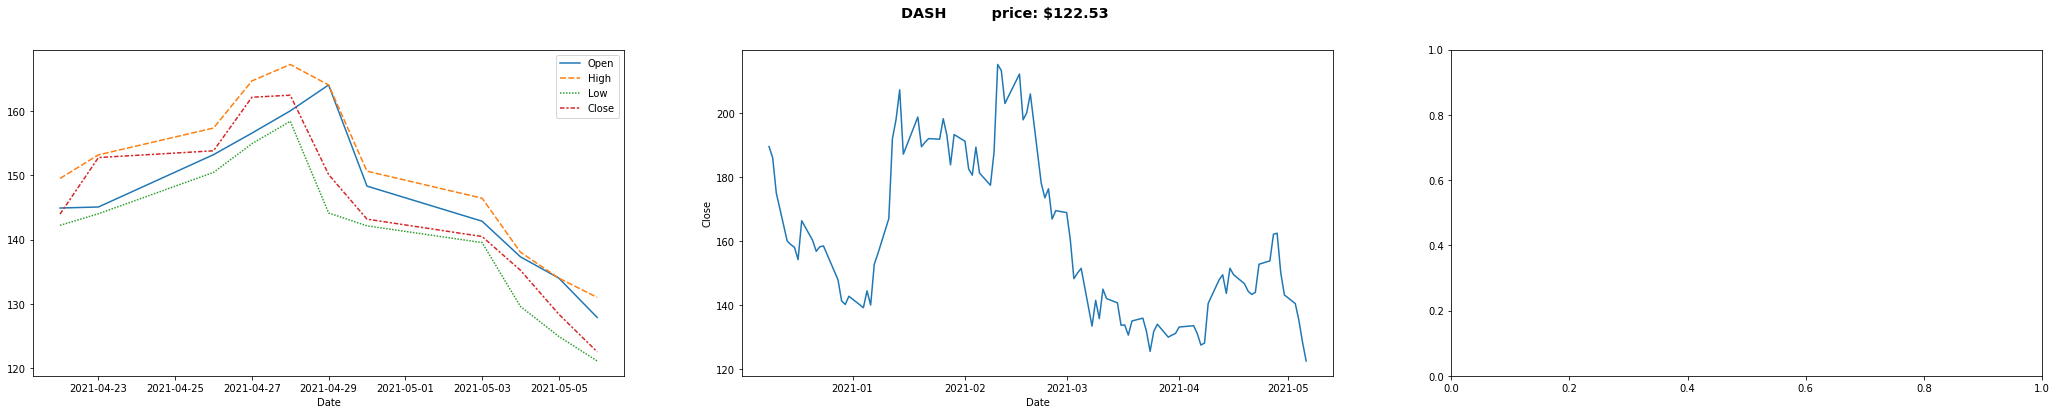

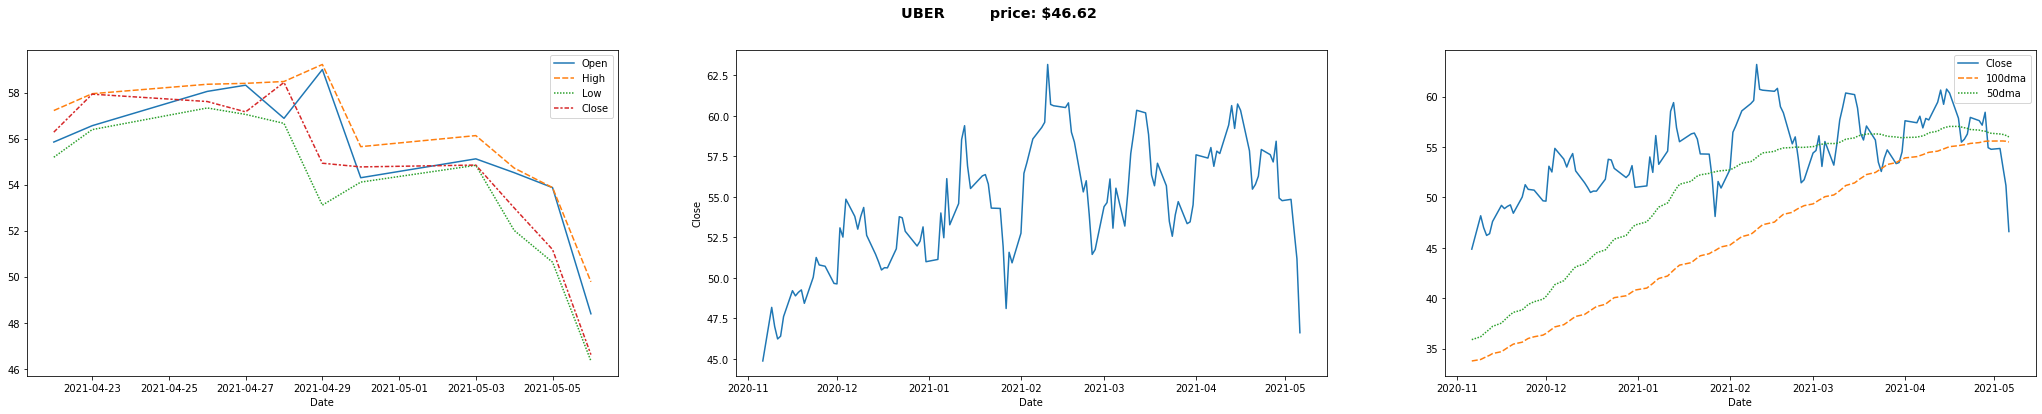

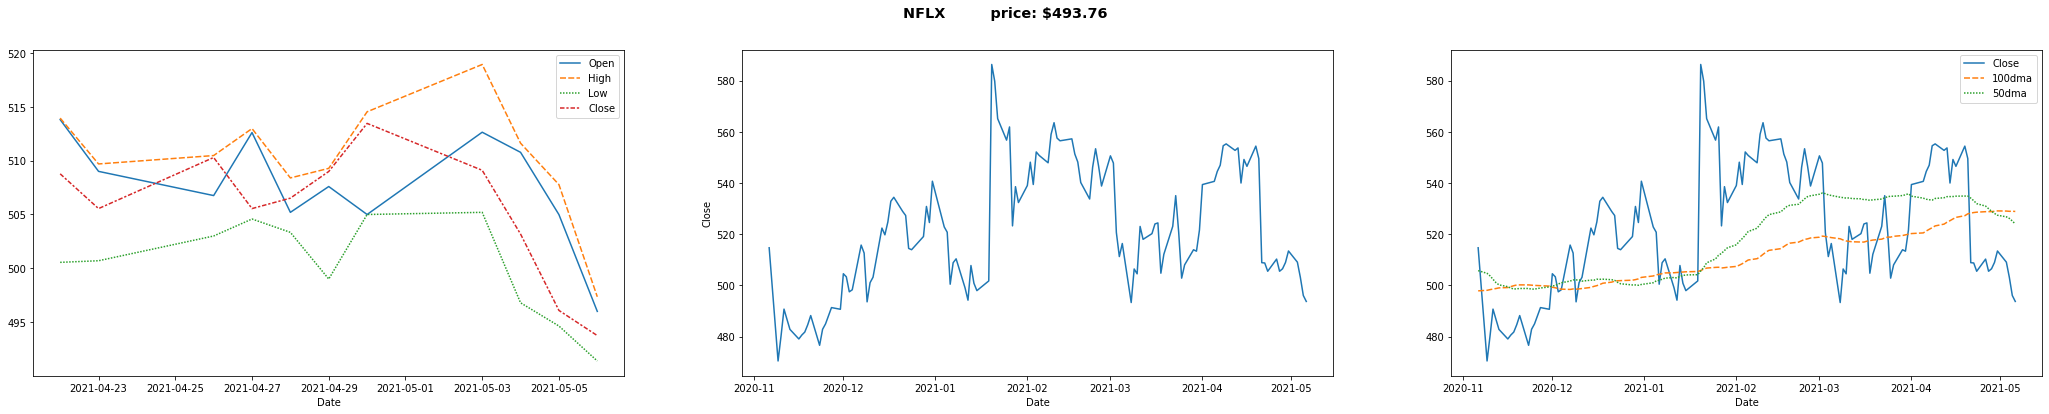

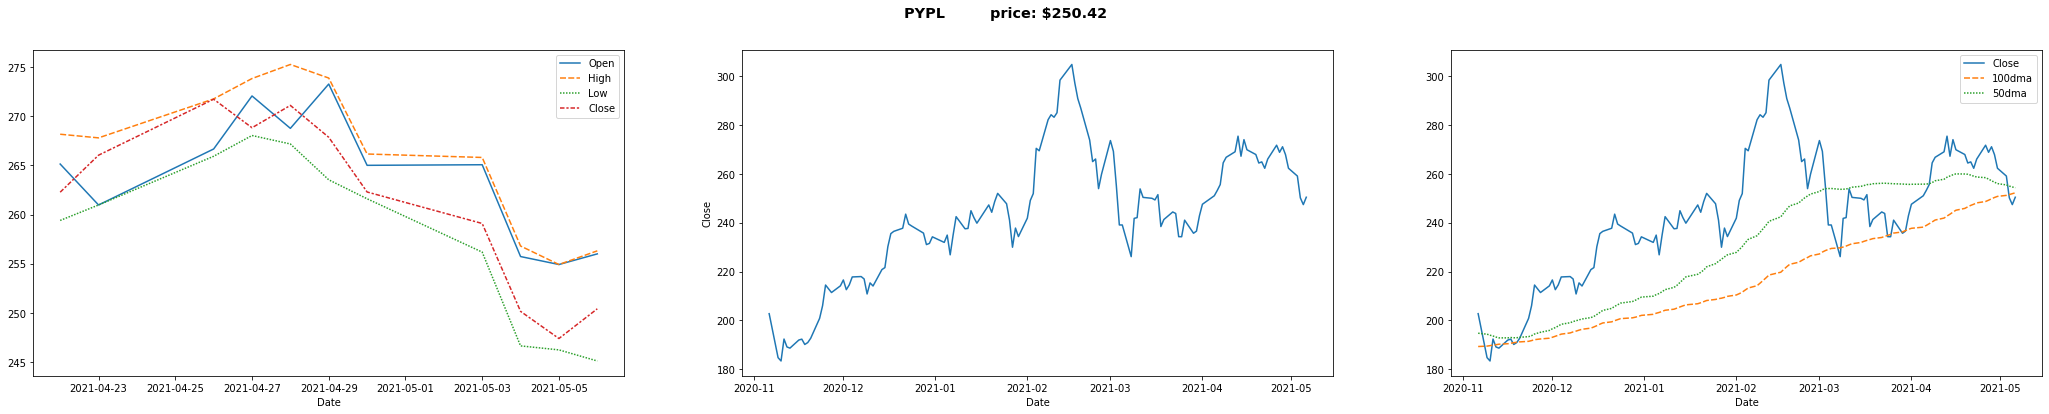

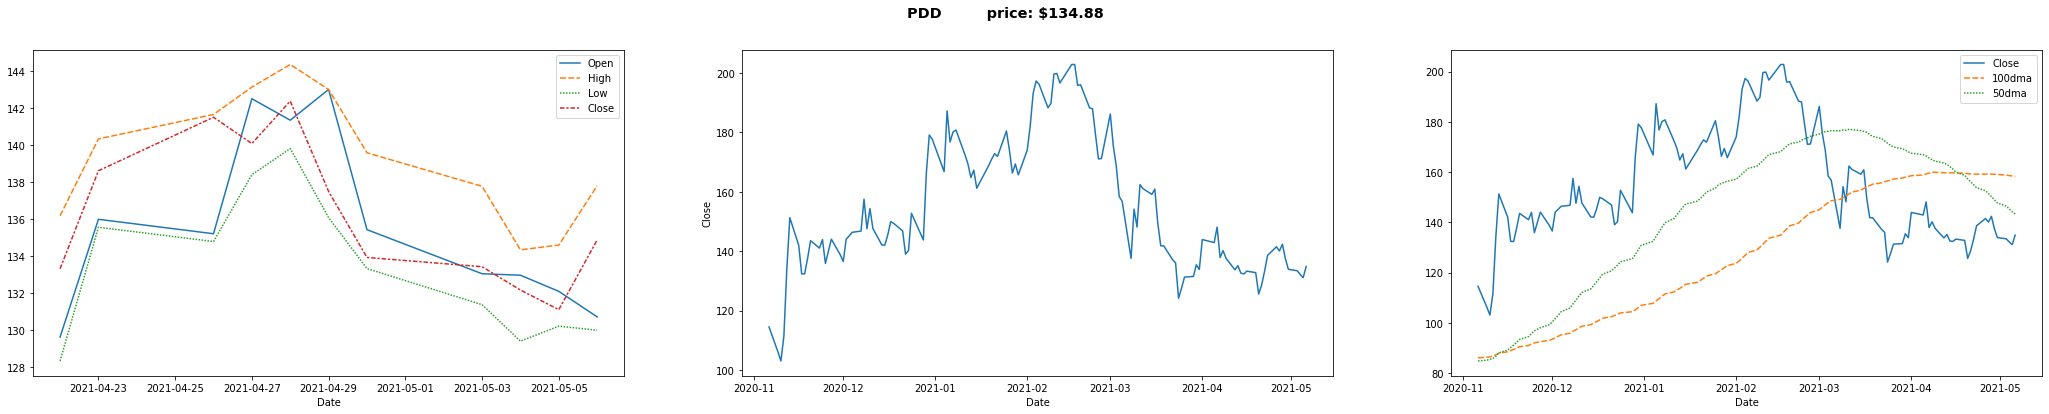

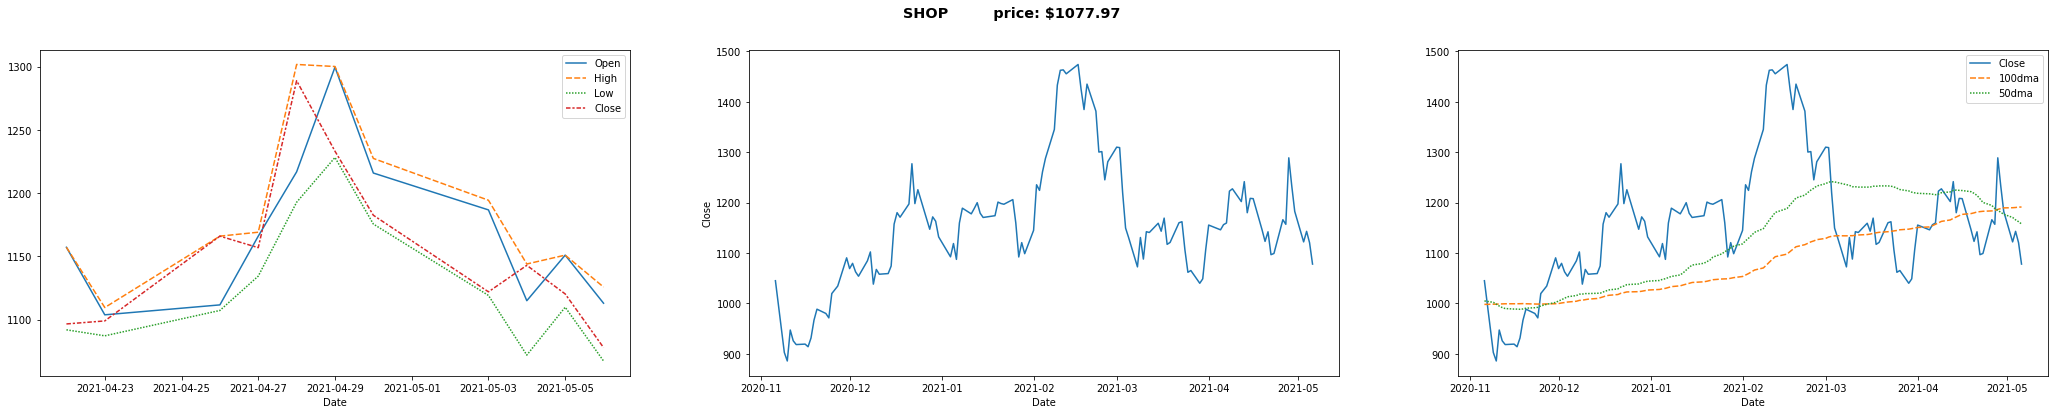

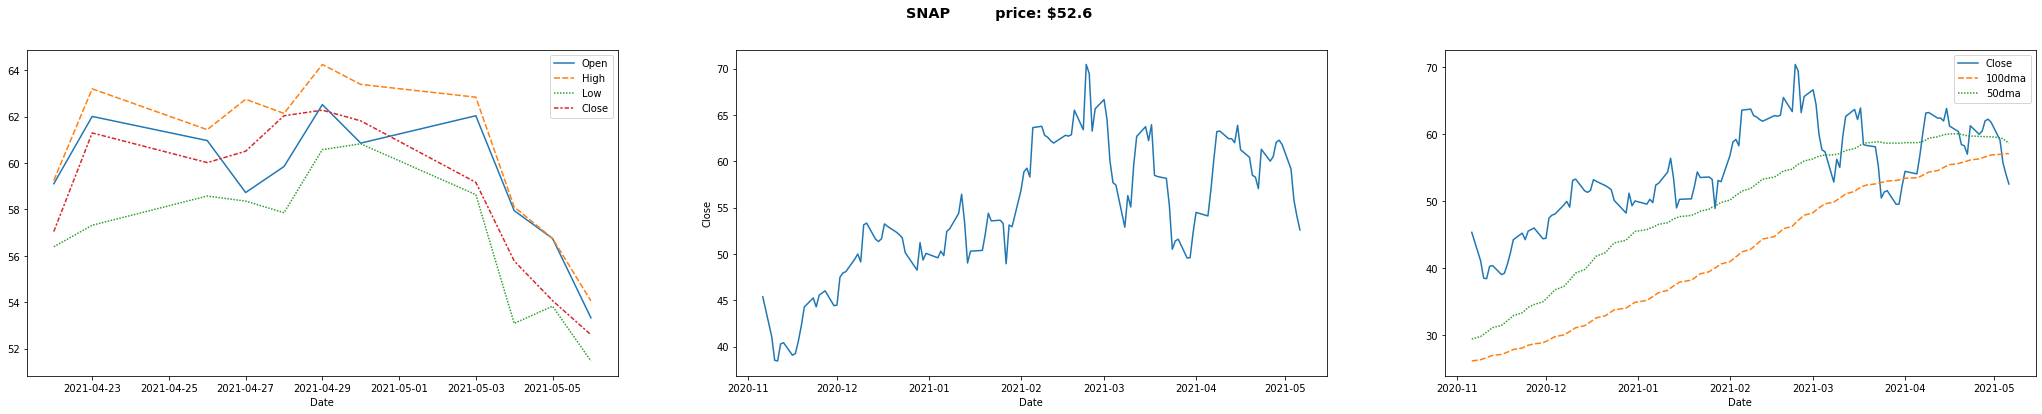

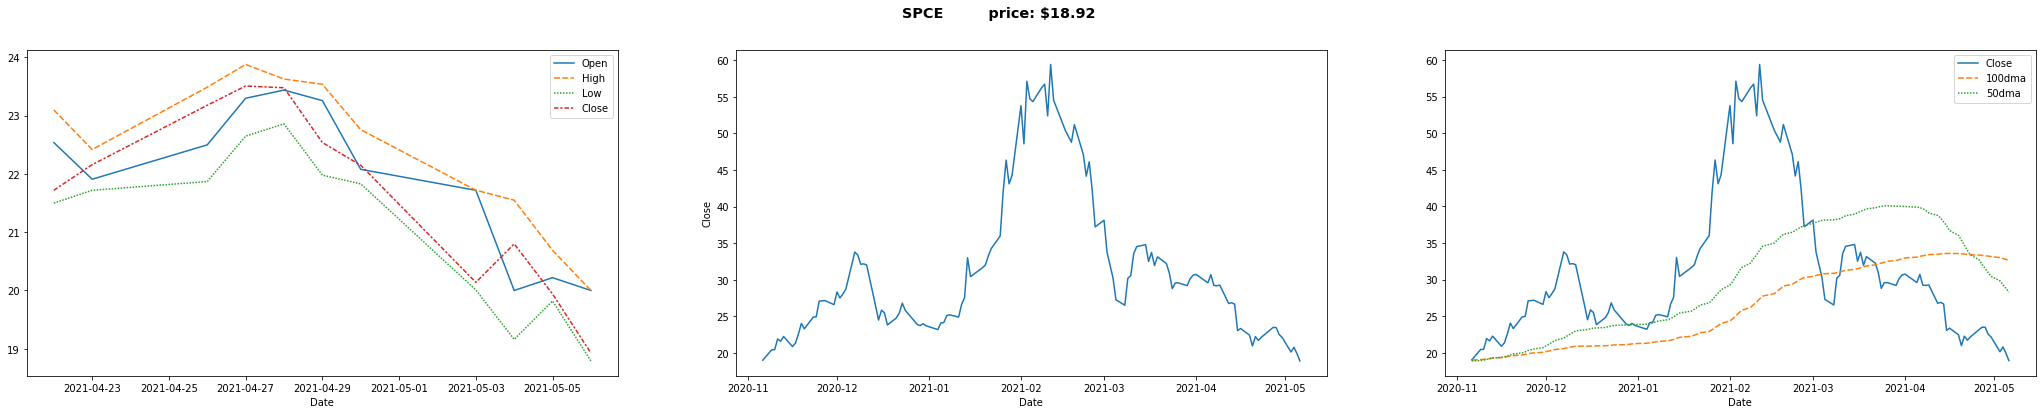

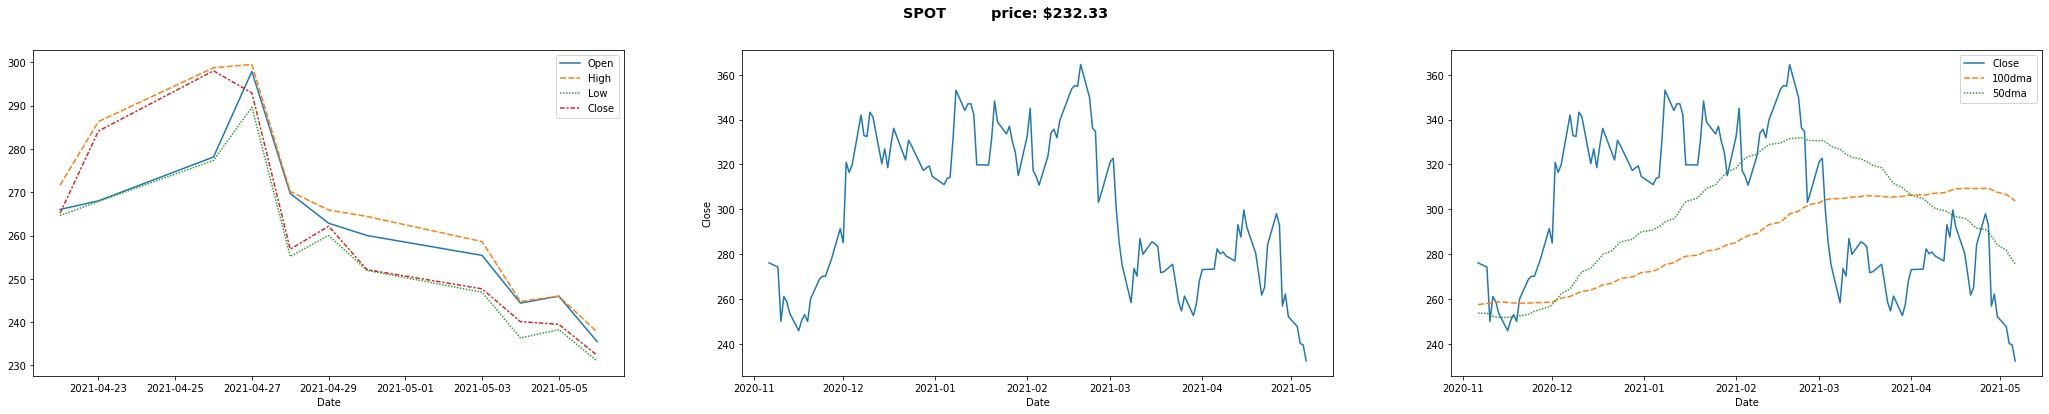

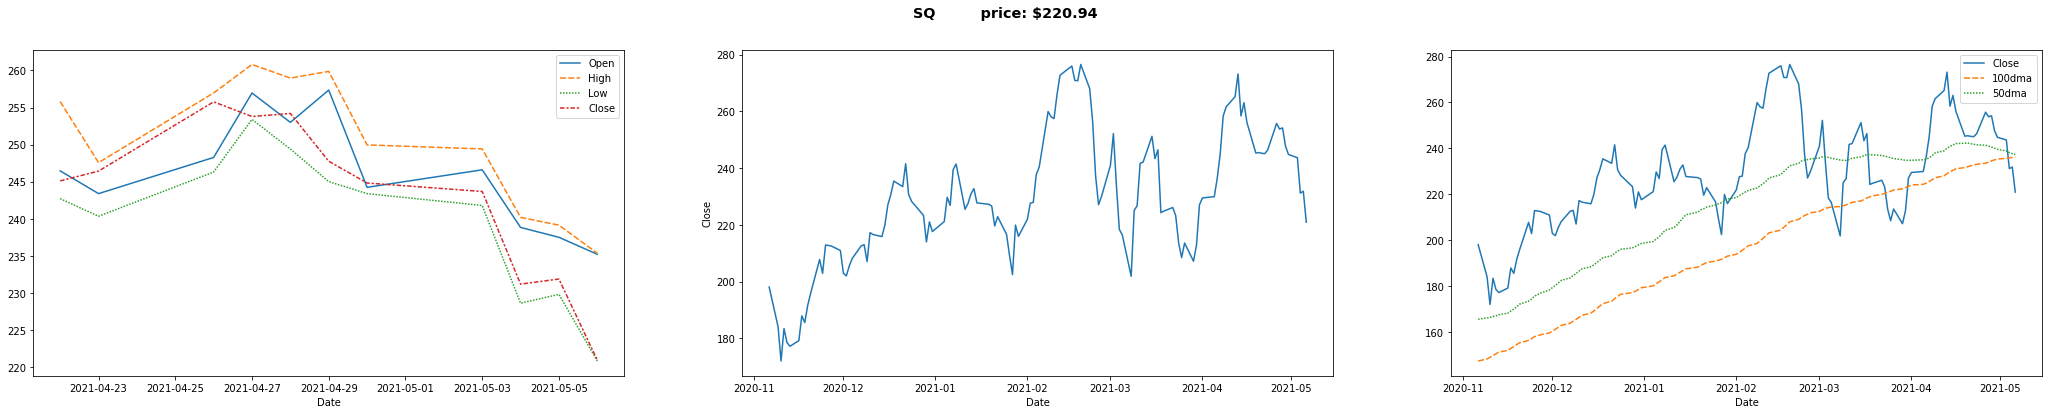

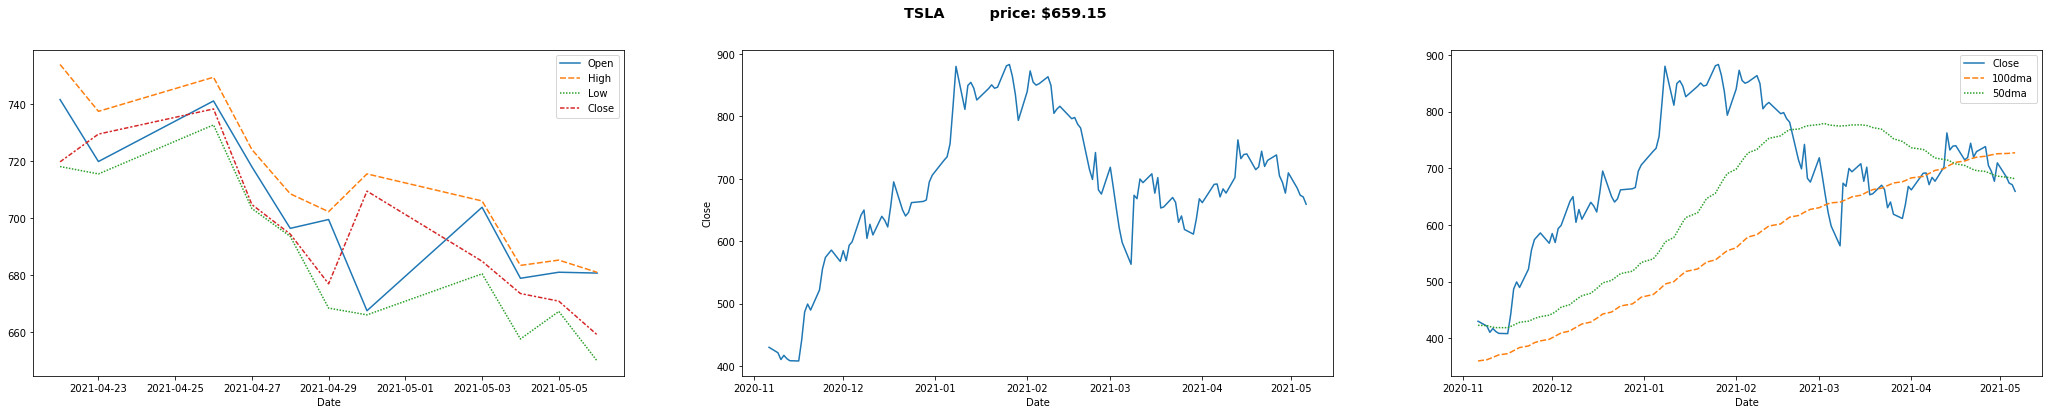

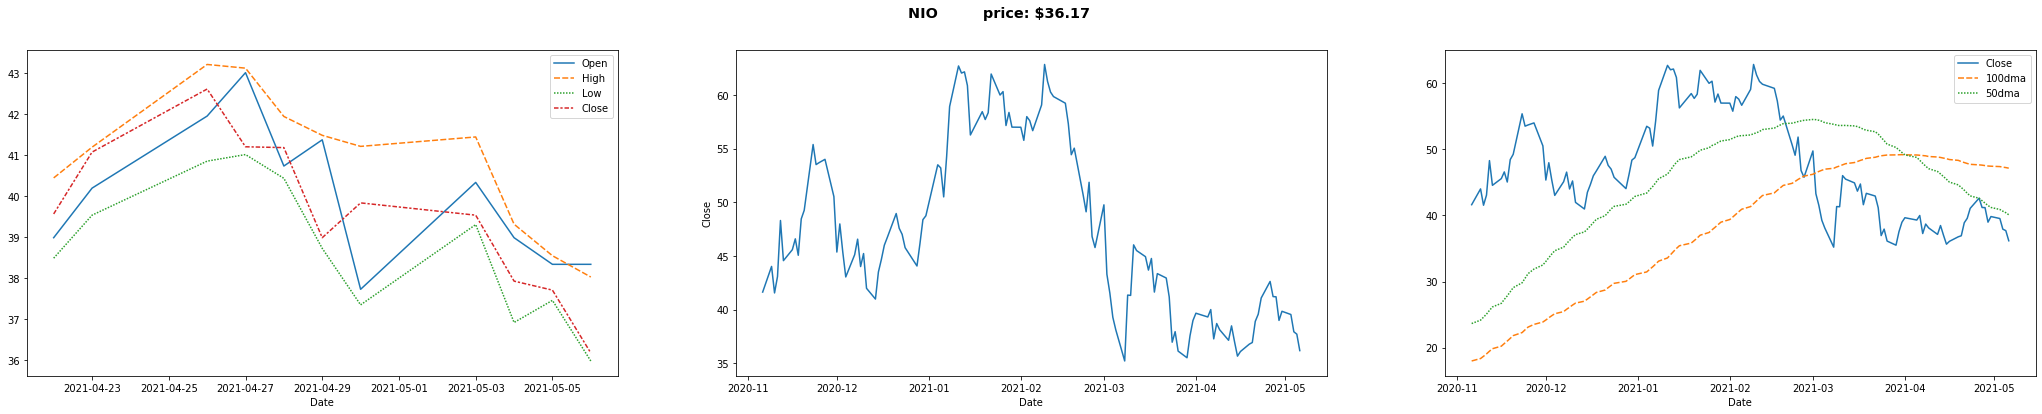

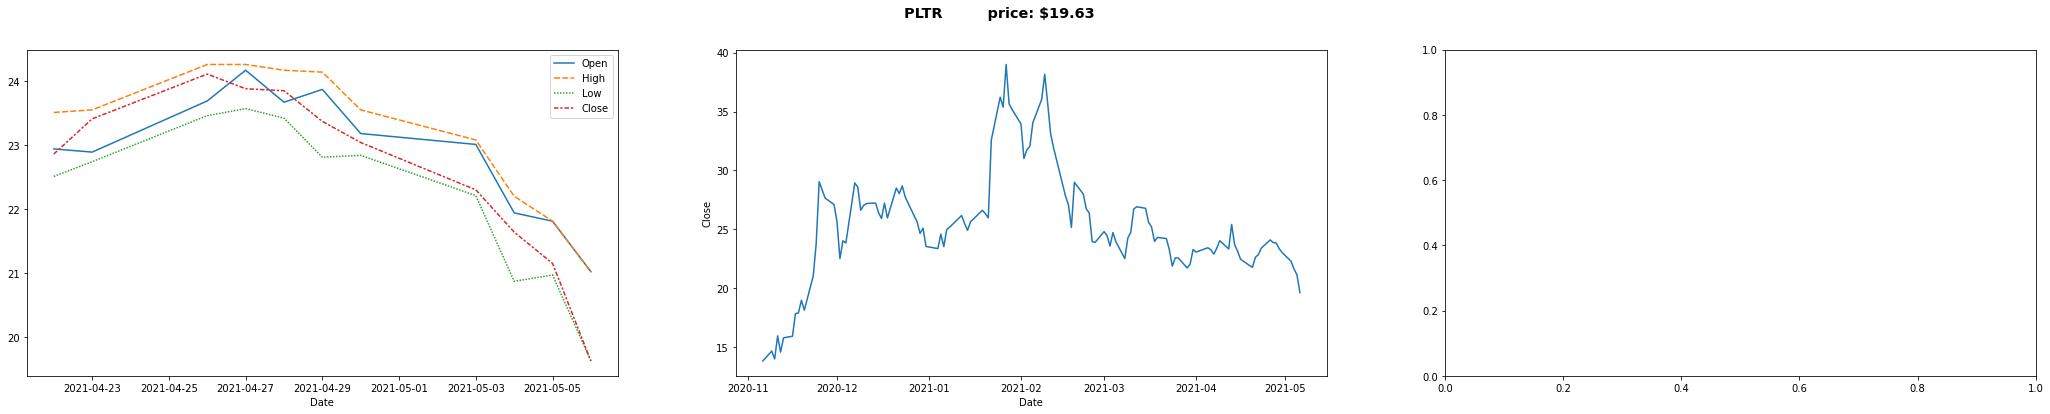

In [ ]:
MultiCharts(my_tickers) 
#Friday April 9th 1pm: etsy/shop/snap/sq put, mile call, wait abnb/bynd call, 

In [ ]:
#MultiCharts(other_tickers)

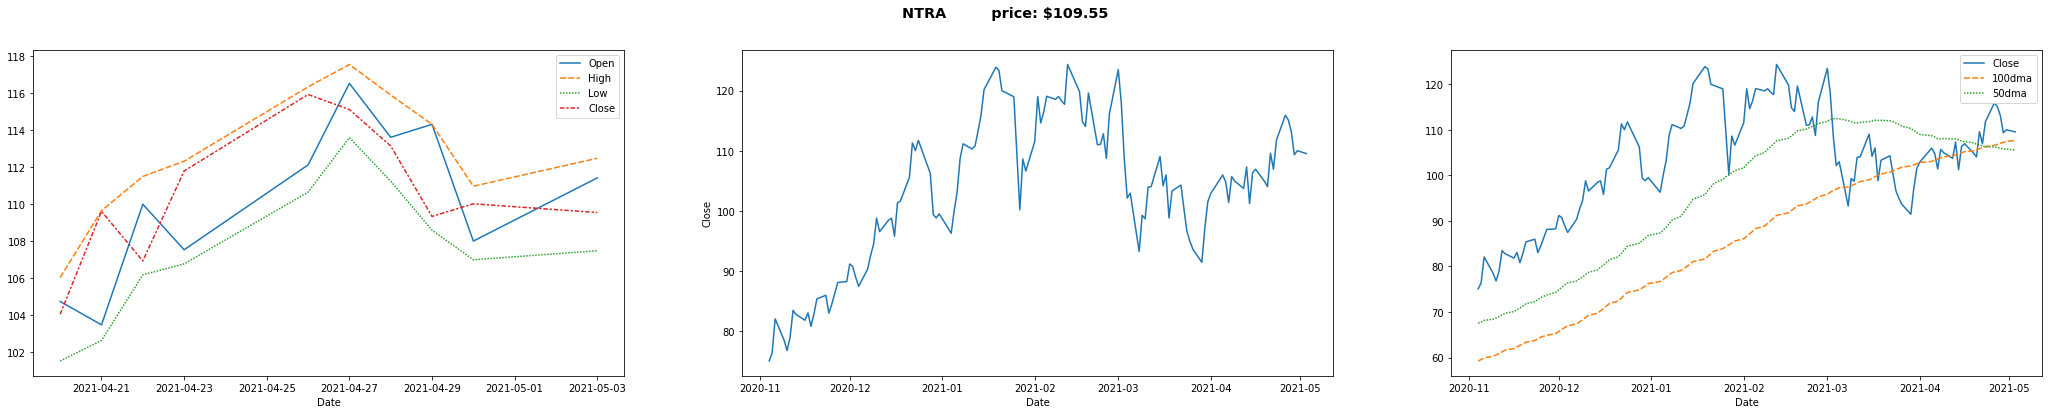

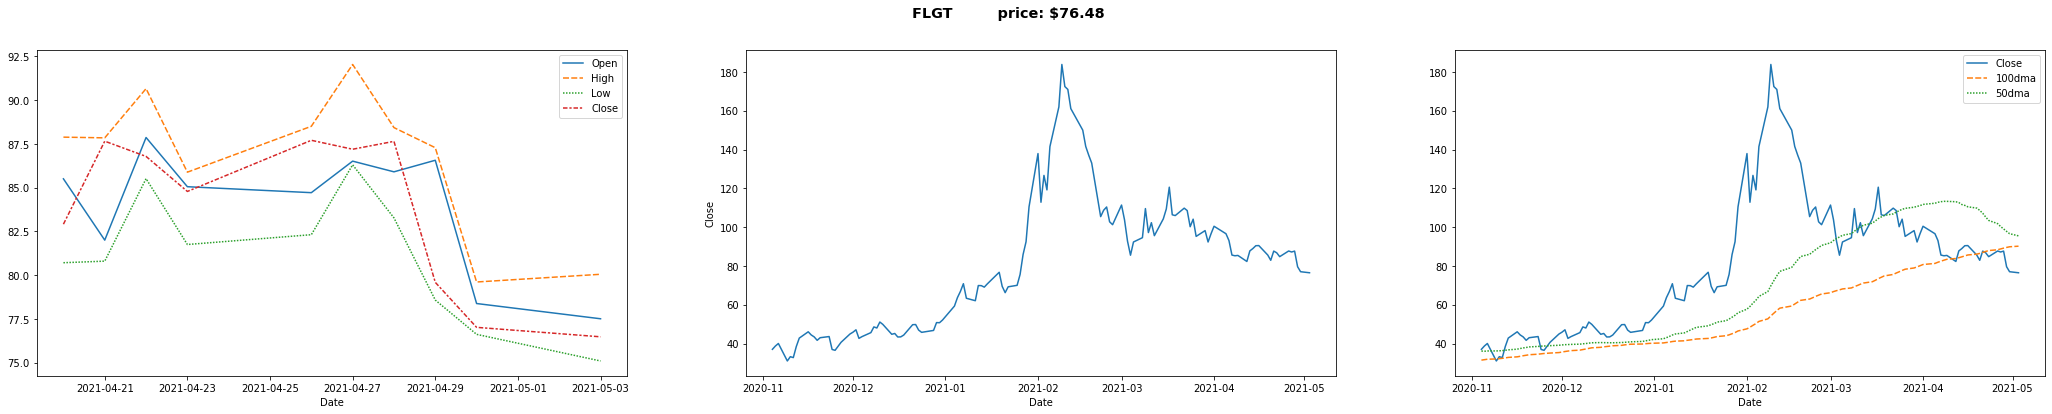

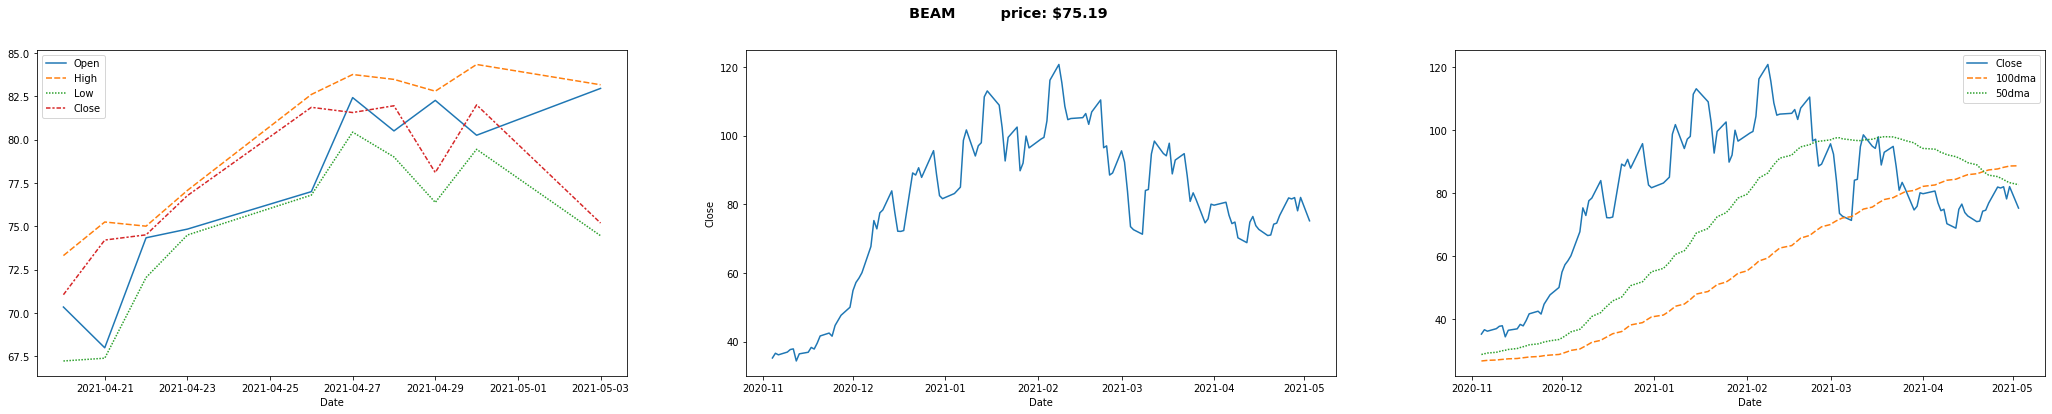

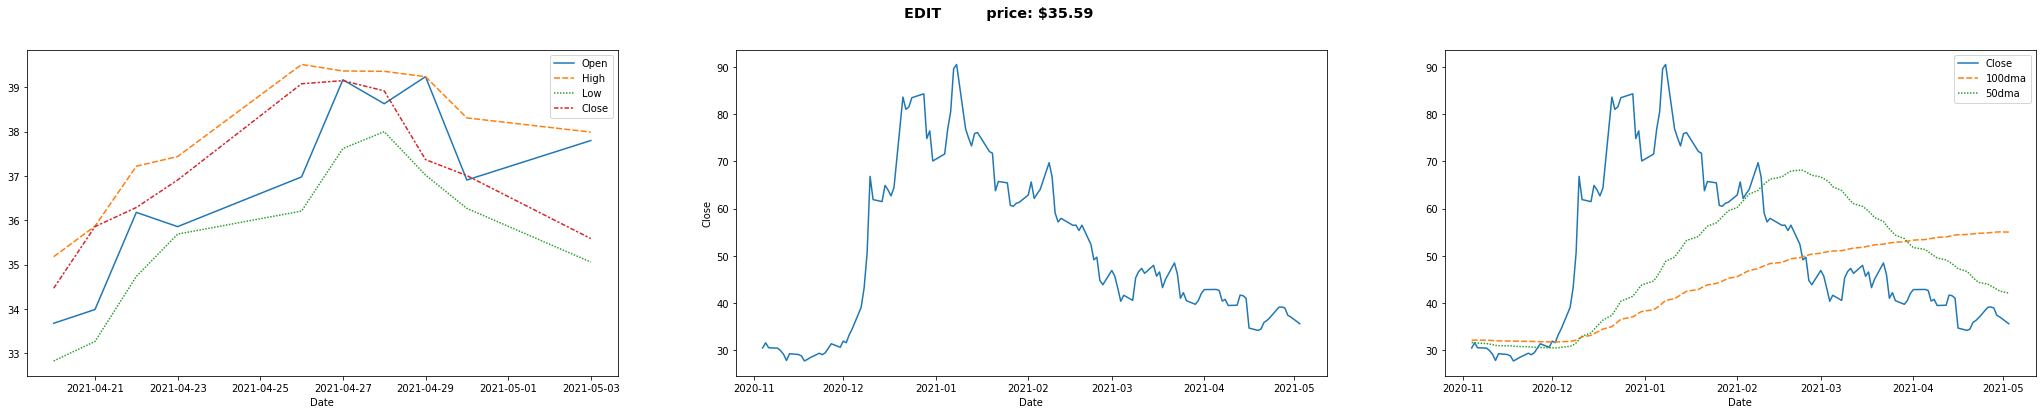

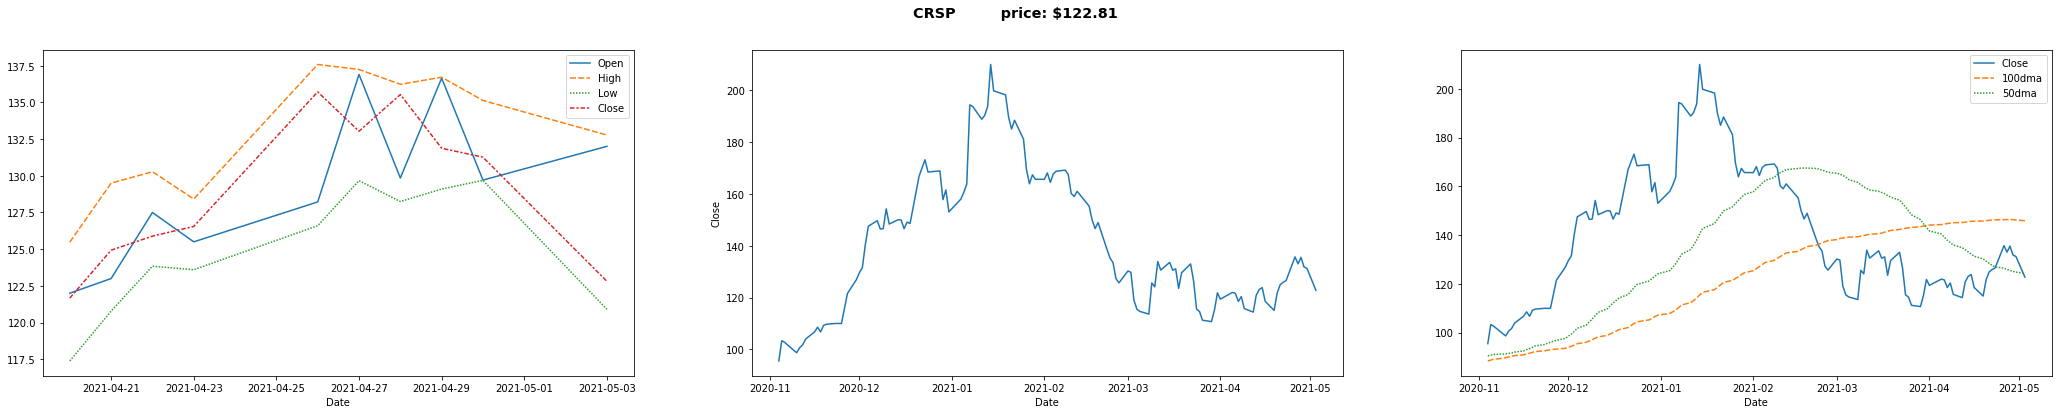

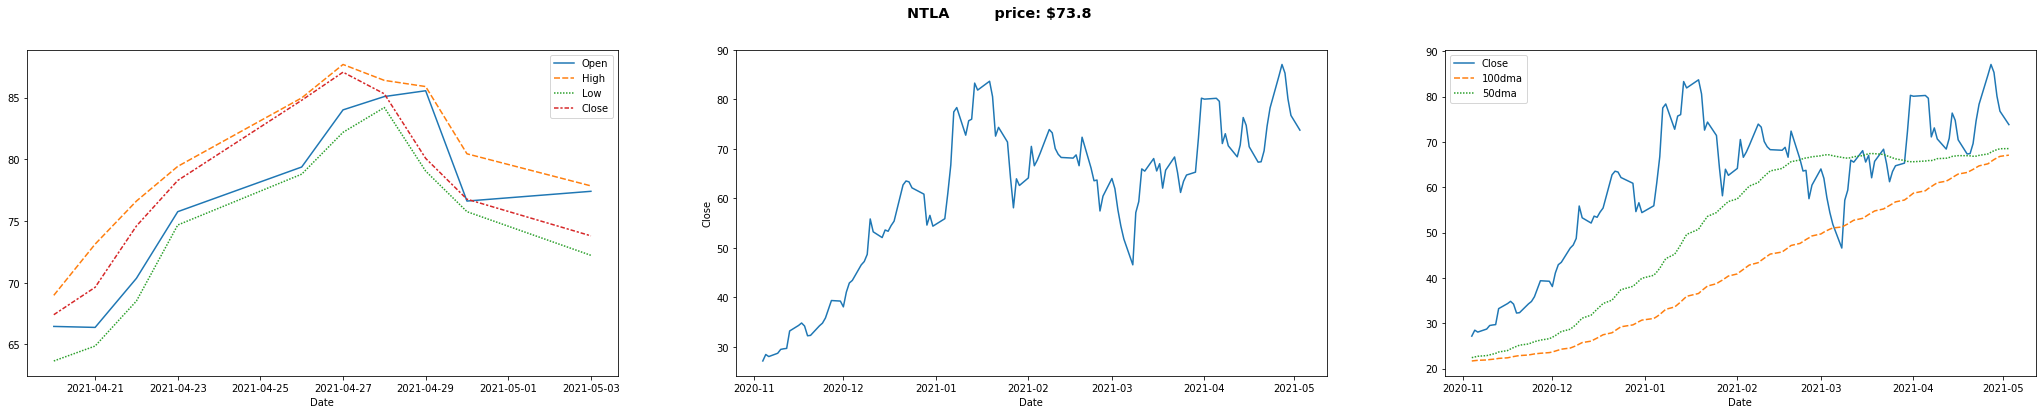

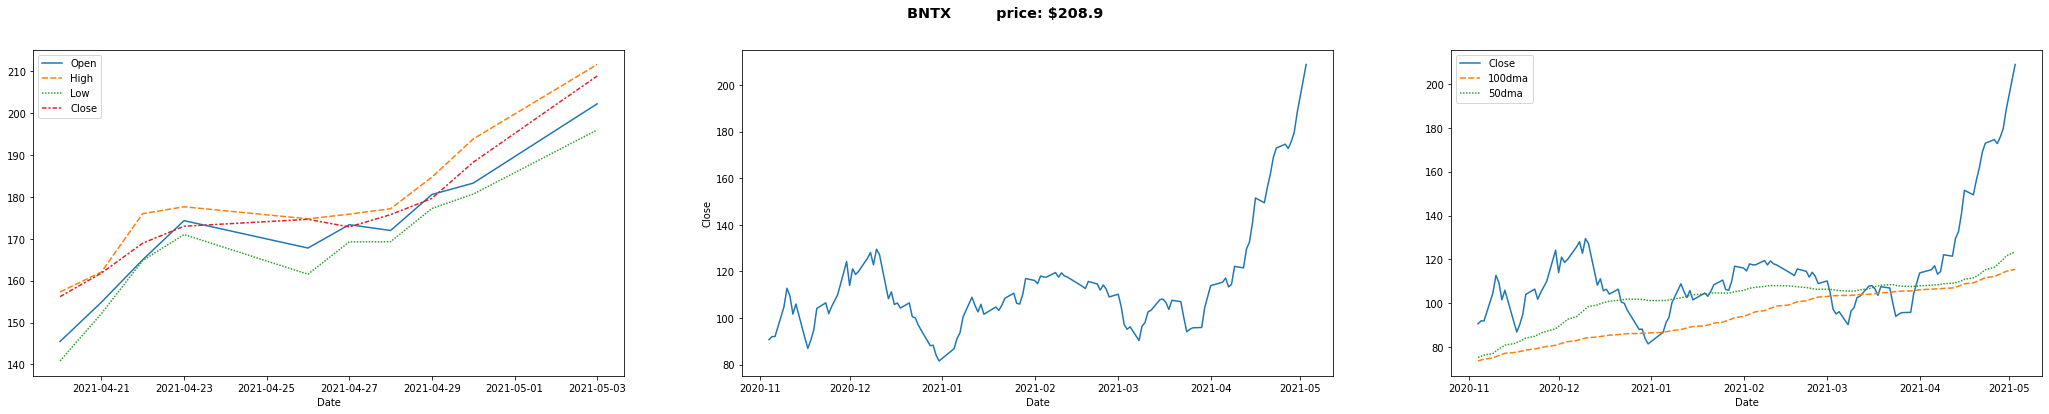

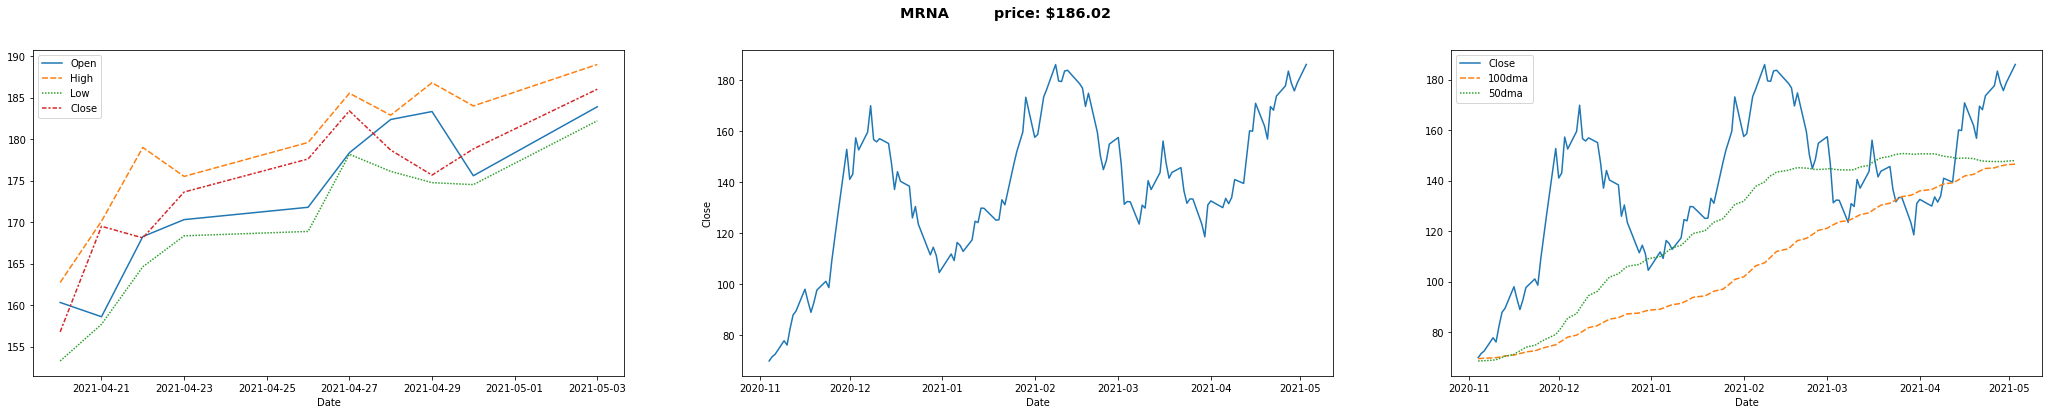

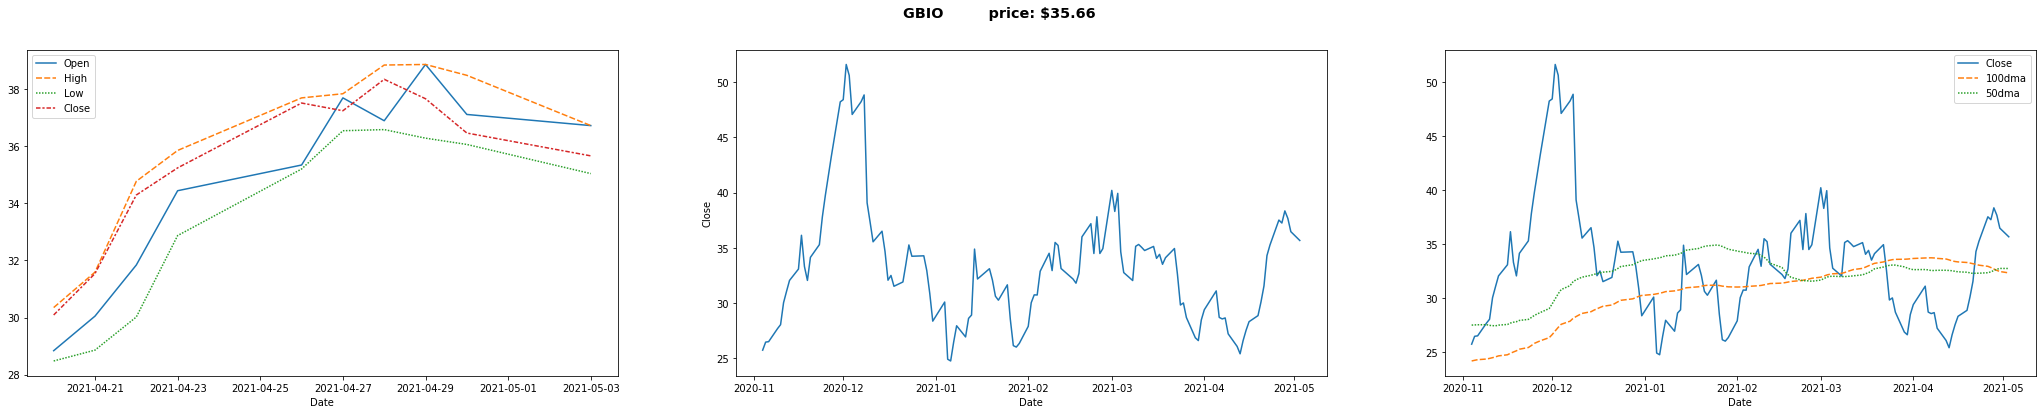

In [ ]:
MultiCharts(bio_tickers)

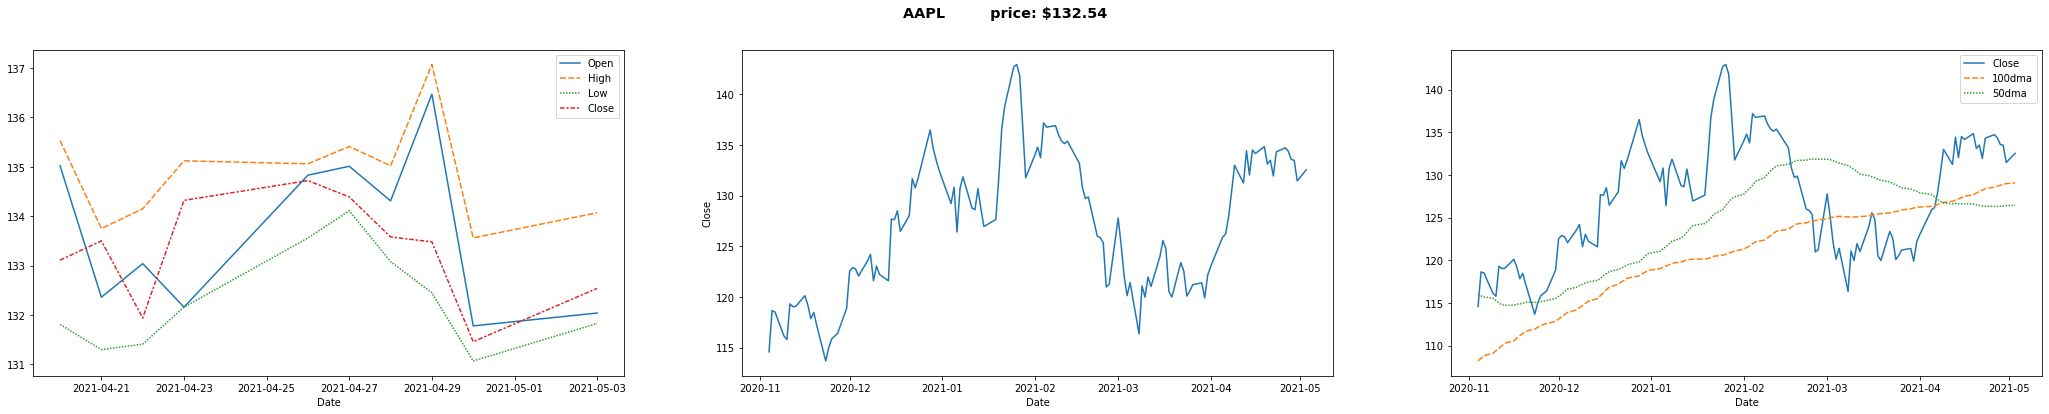

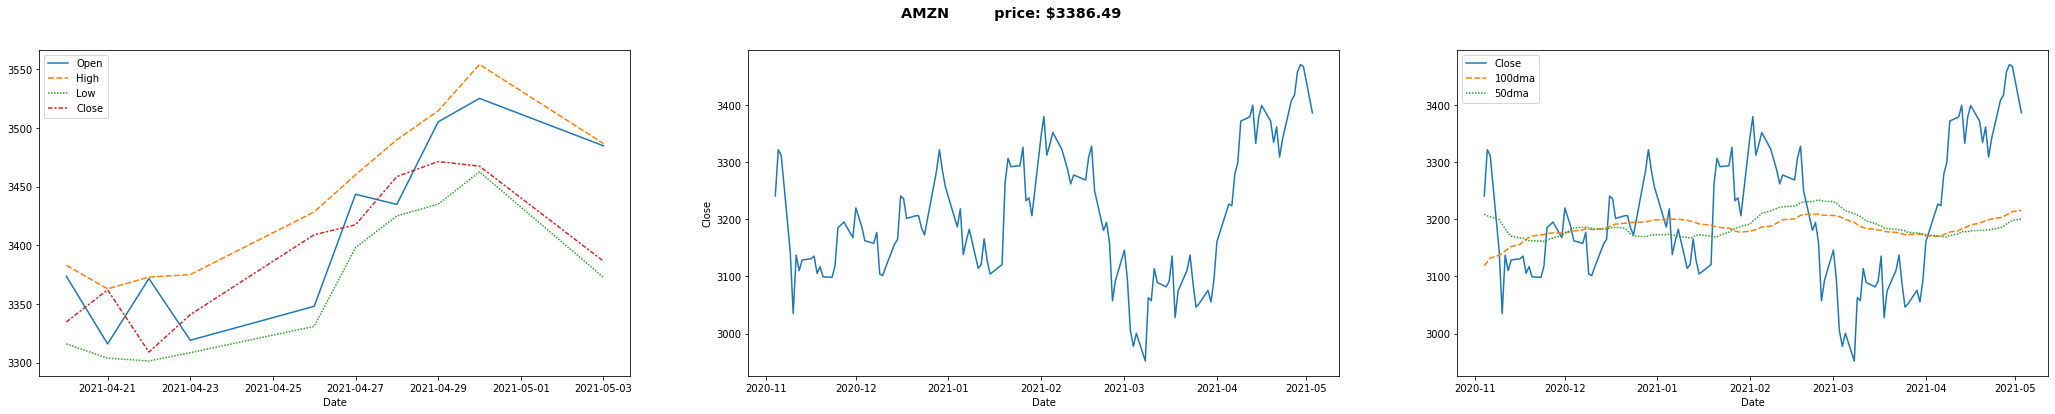

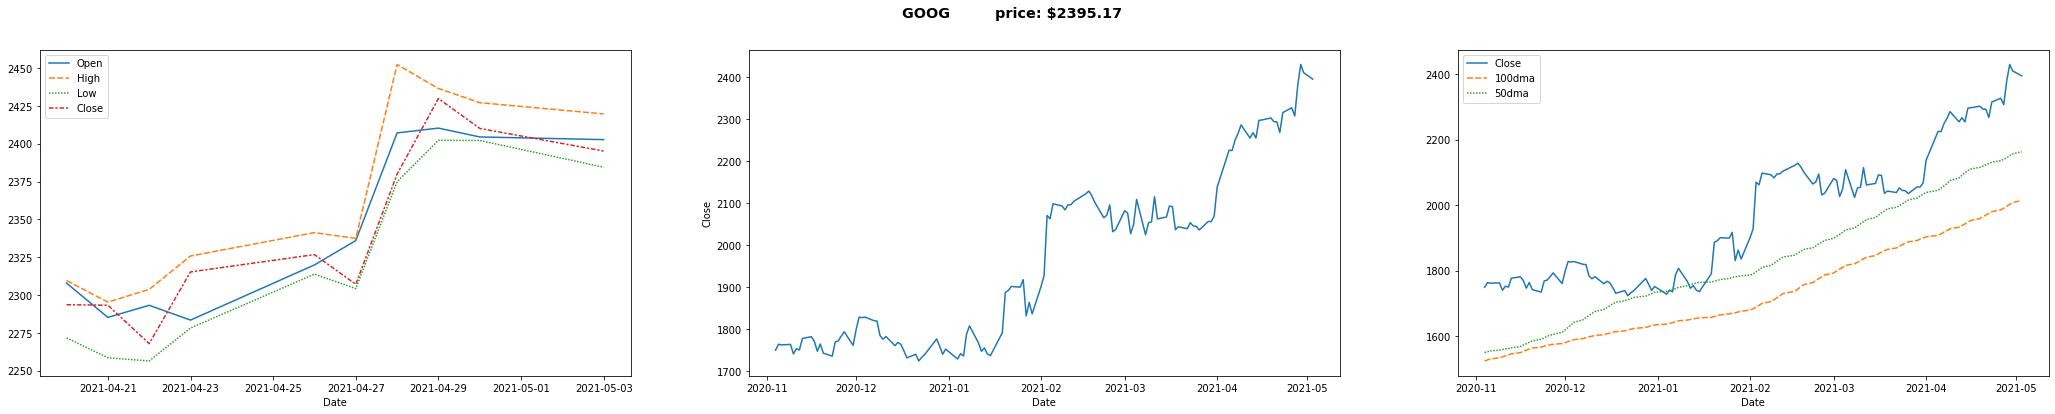

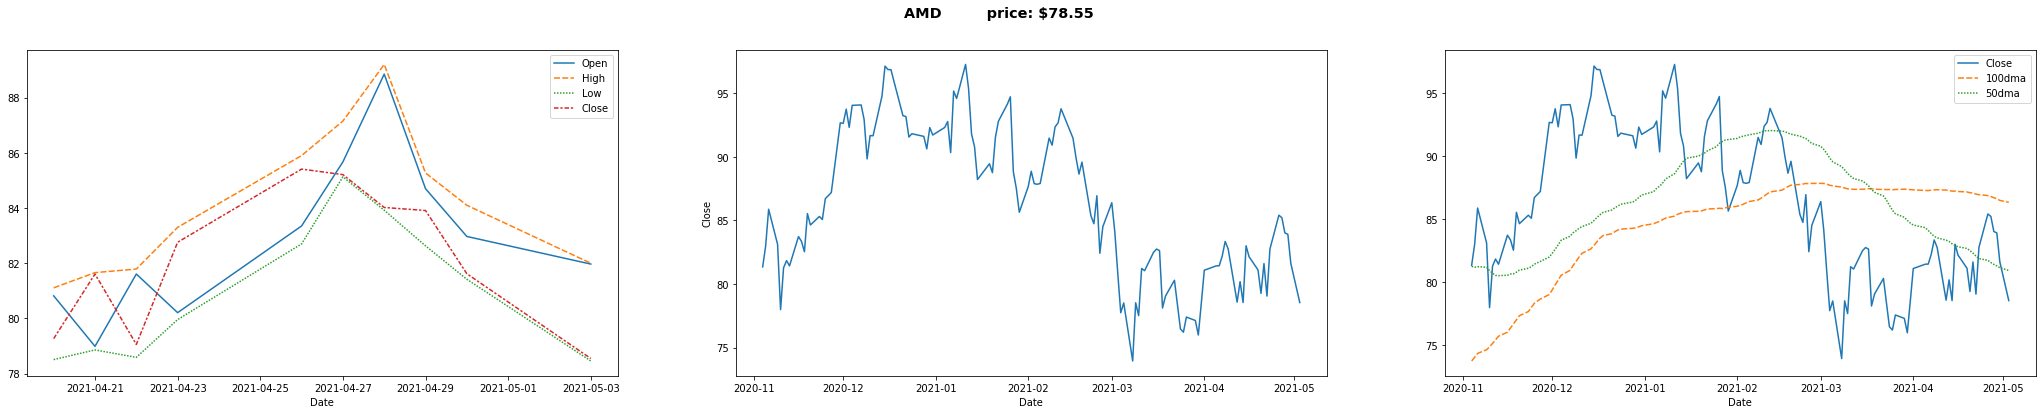

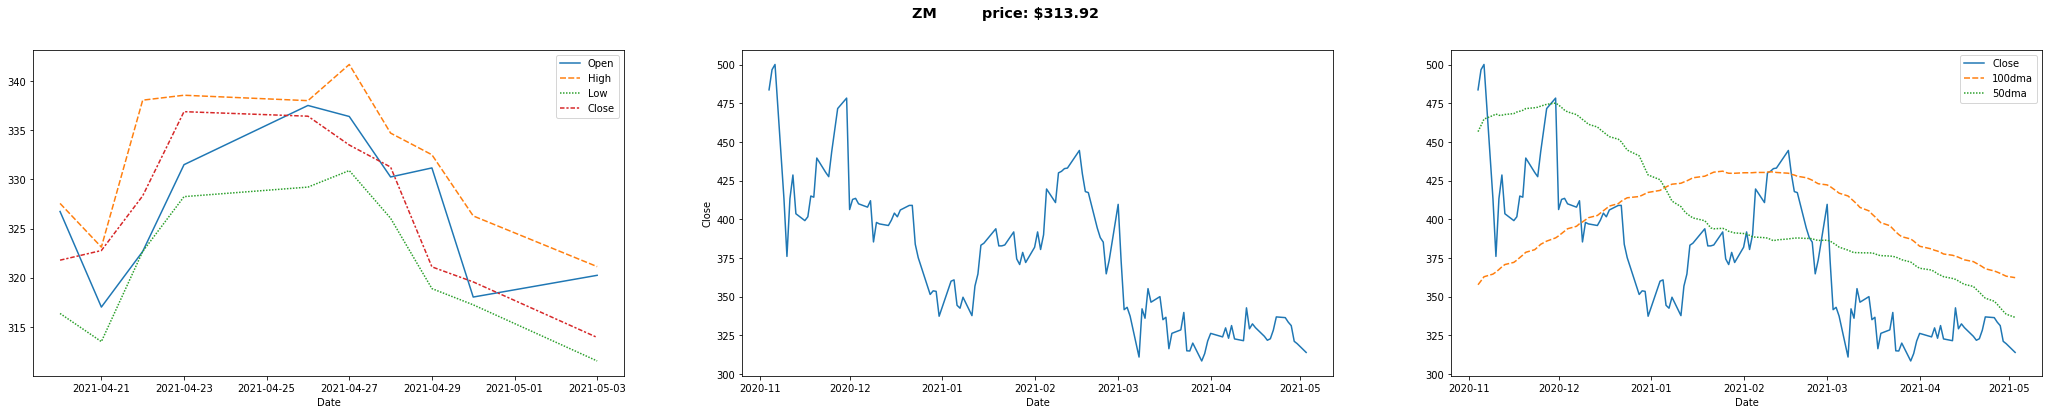

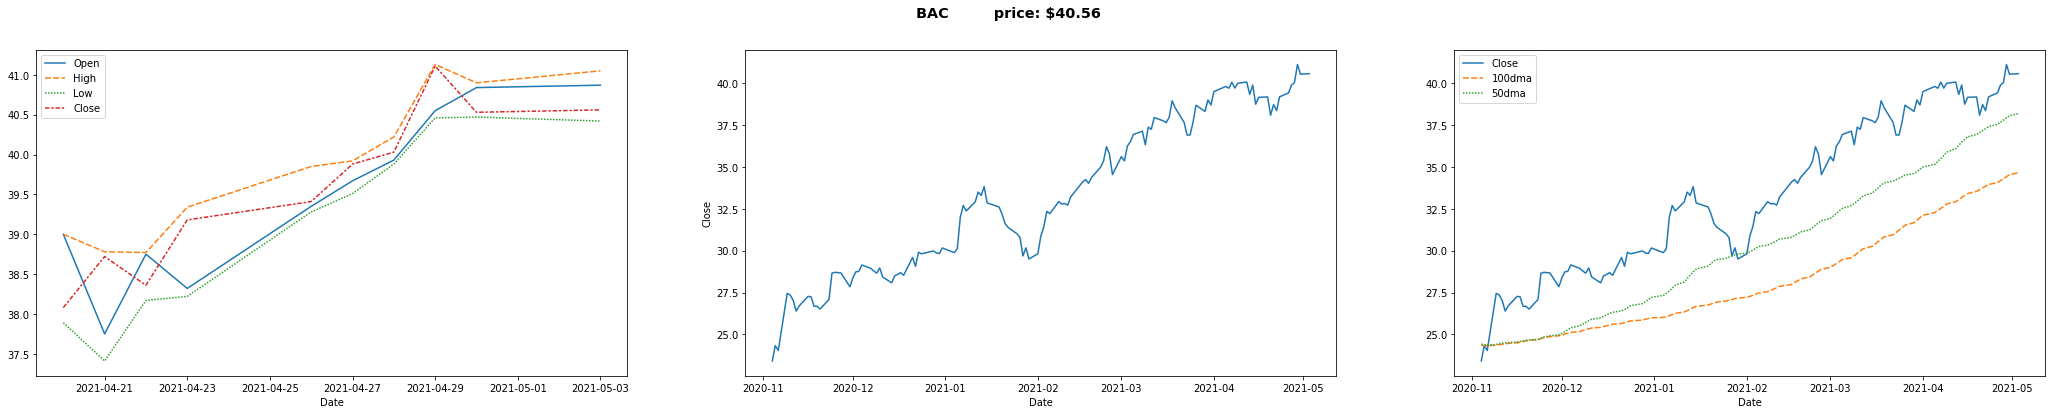

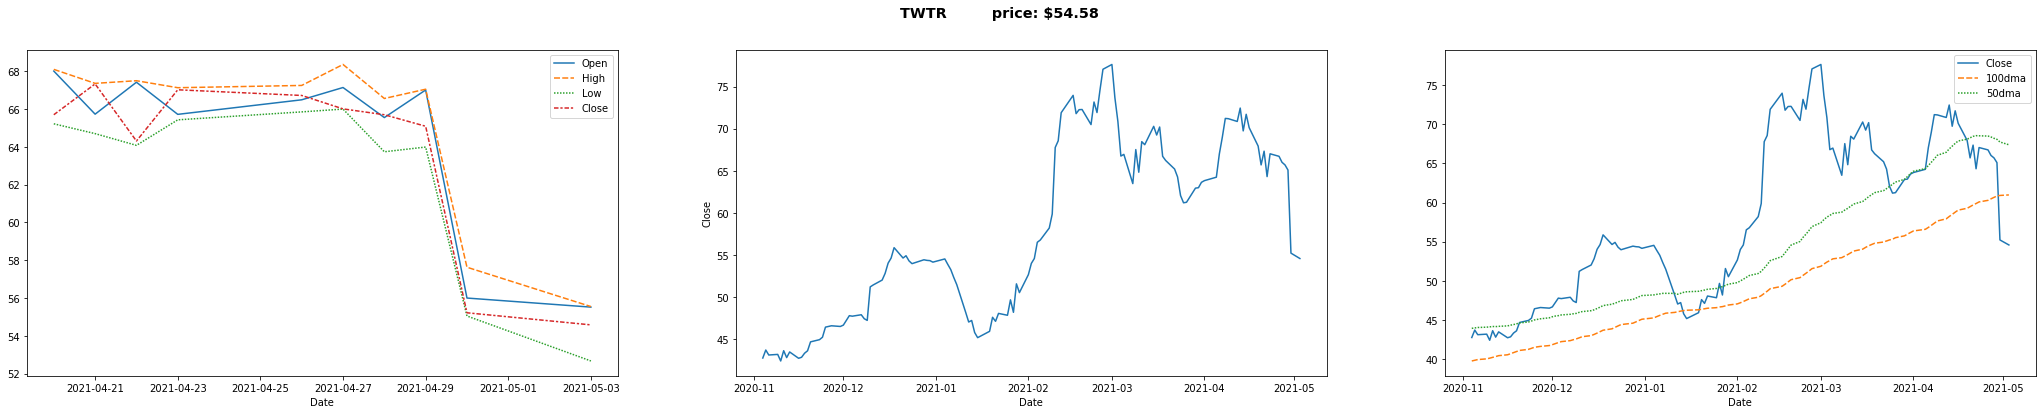

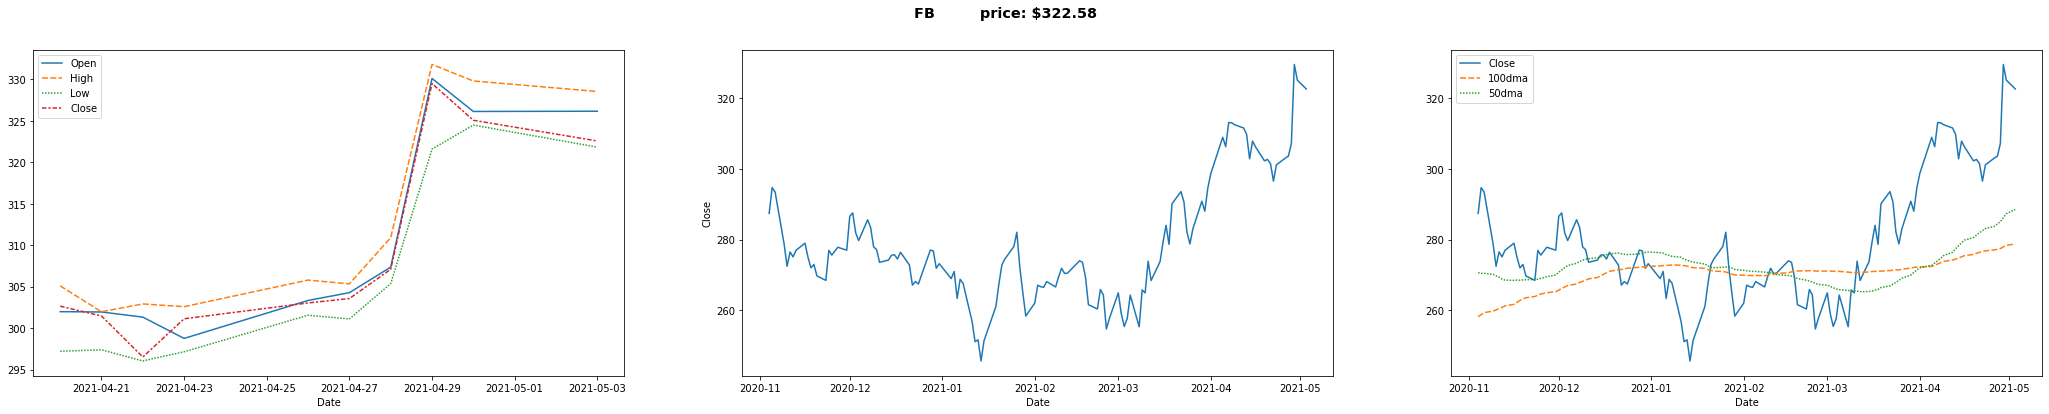

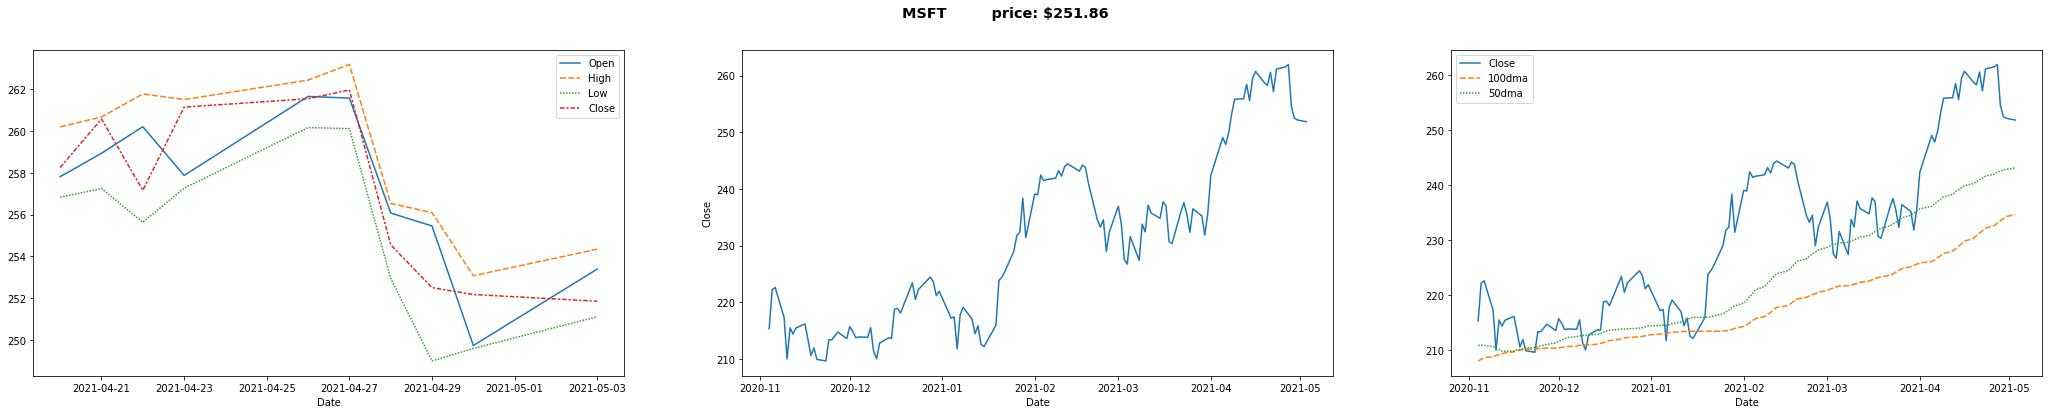

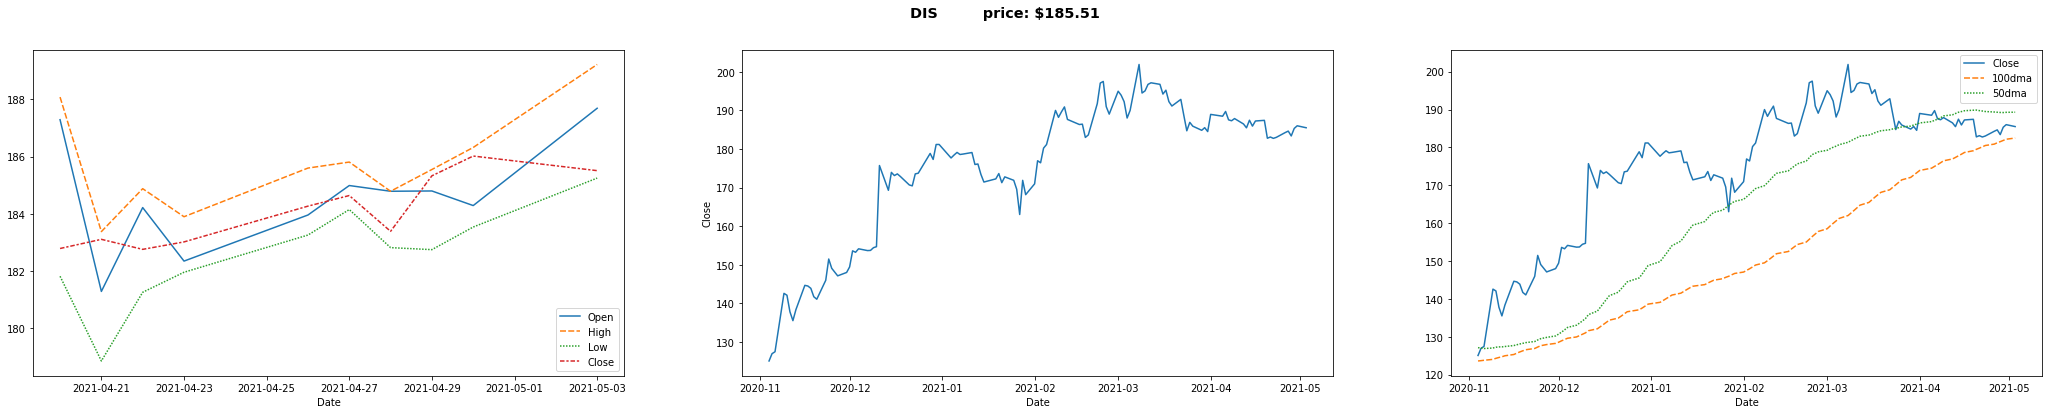

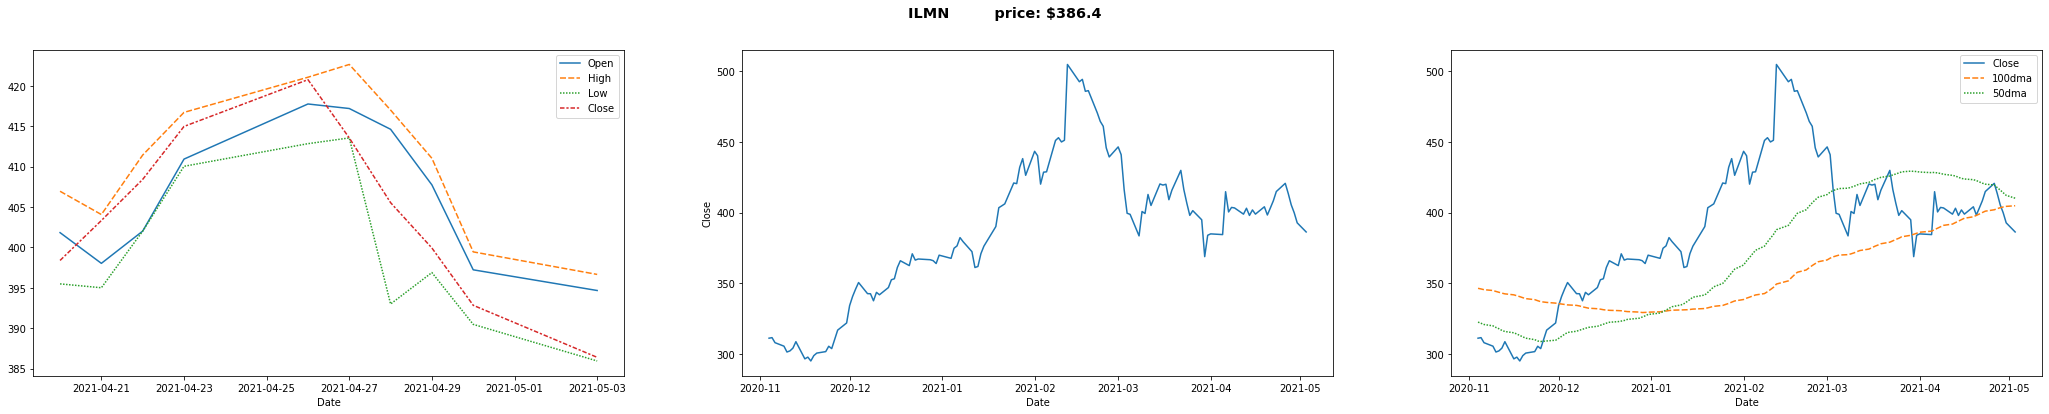

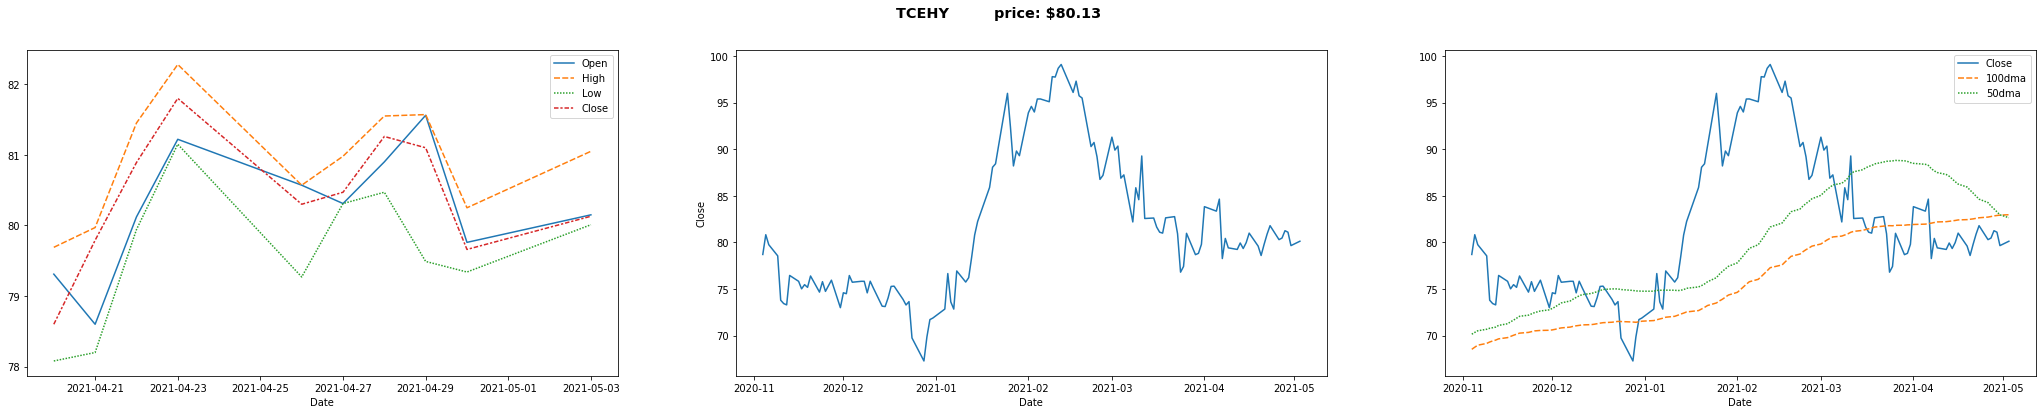

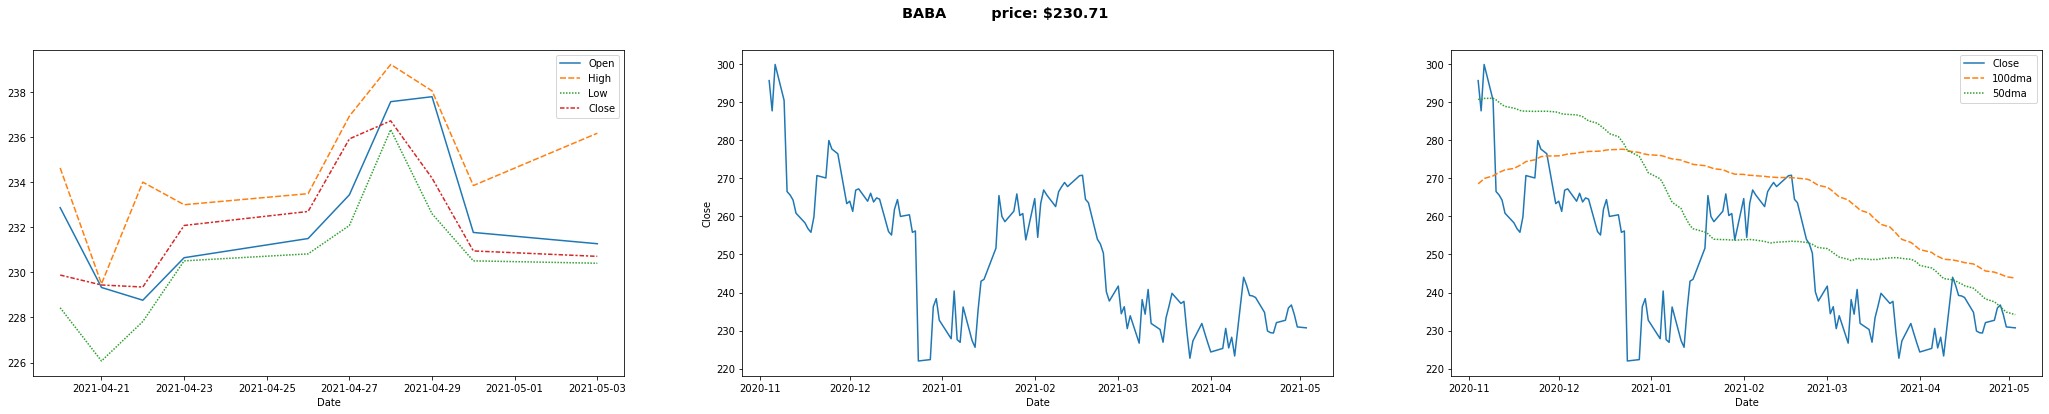

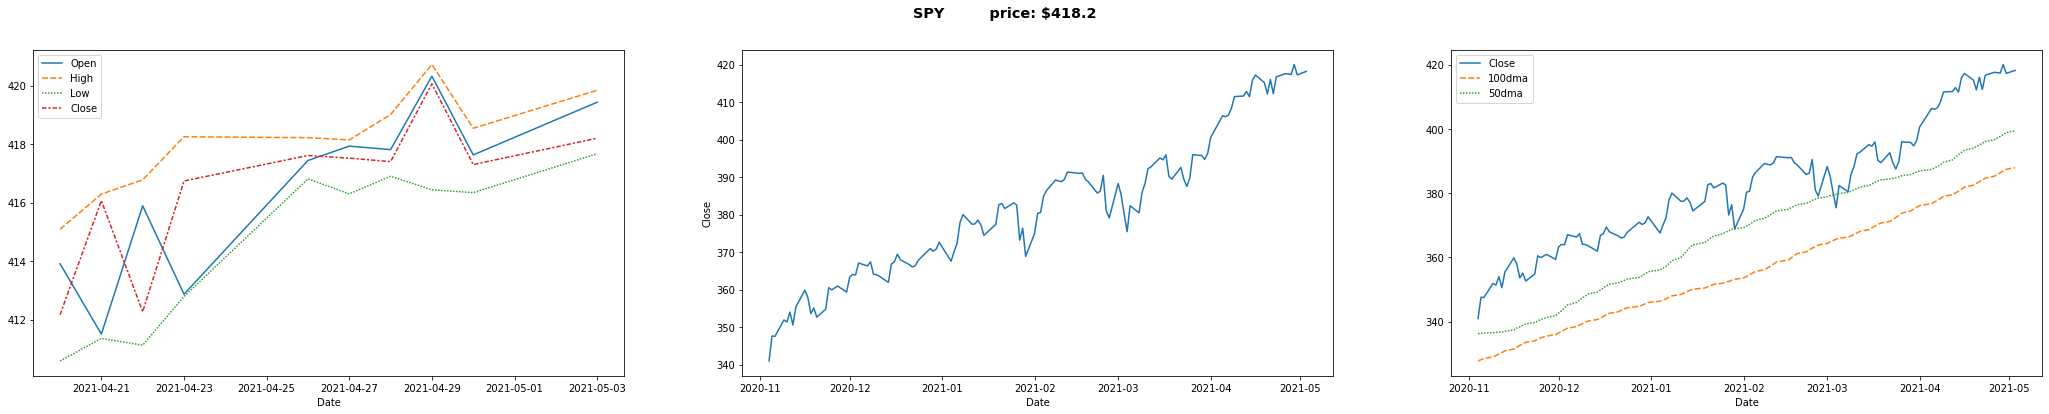

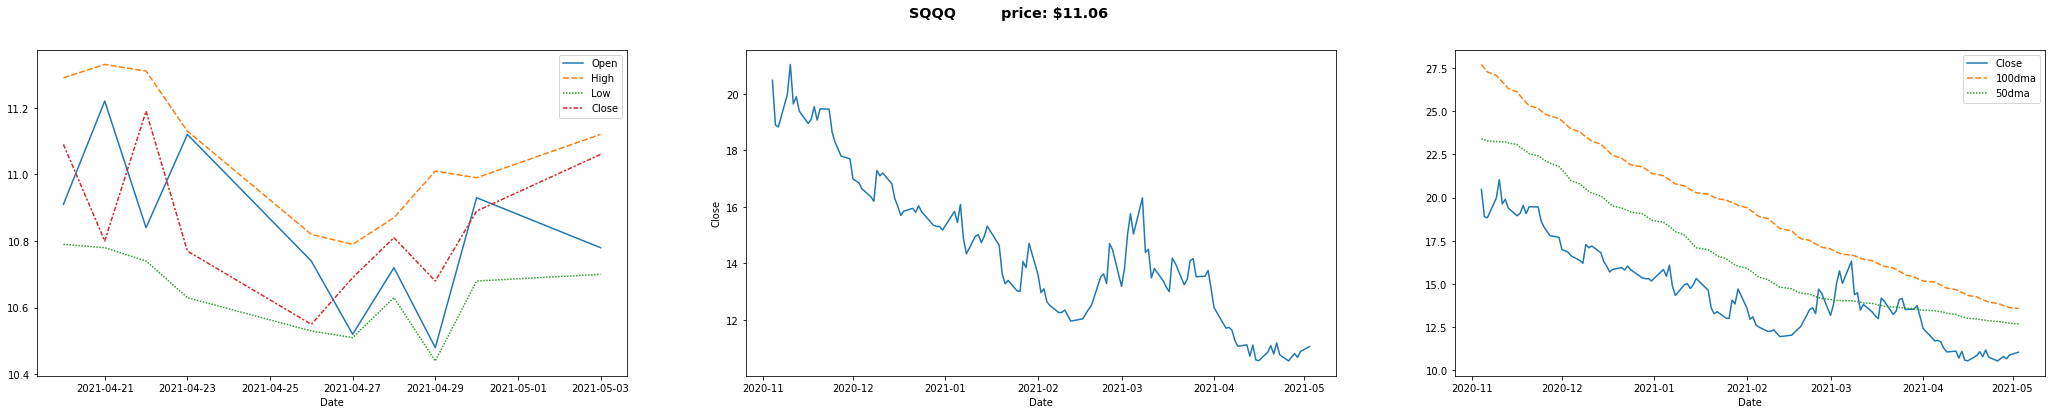

In [ ]:
MultiCharts(blue_chips)

In [ ]:
test = yf.Ticker("AMZN")
test.recommendations

Firm      To Grade From Grade Action
Date                                                               
2011-12-29 12:47:00    PiperJaffray                            main
2012-02-15 07:33:00    PiperJaffray    Overweight              main
2012-02-16 06:17:00  Morgan Stanley  Equal-Weight              down
2012-04-02 06:06:00    Bank oferica       Neutral              down
2012-04-27 06:21:00    Bank oferica           Buy                up
...                             ...           ...        ...    ...
2021-02-03 18:14:56       Benchmark           Buy              main
2021-02-03 18:28:28             UBS           Buy              main
2021-02-17 16:34:30       Citigroup           Buy              main
2021-04-16 11:54:09   Credit Suisse    Outperform              main
2021-04-21 14:24:21     Oppenheimer    Outperform              main

[423 rows x 4 columns]